# PART 0: LOAD PACKAGES, LOAD DATA

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions,category_scatter
from pandas.plotting import scatter_matrix
import graphviz
from itertools import cycle, islice
import pickle

from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,cross_val_score,cross_validate,GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,OneHotEncoder,LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,precision_score, recall_score, accuracy_score,mean_squared_error,r2_score, \
     accuracy_score,f1_score,roc_auc_score,roc_curve,pairwise,adjusted_rand_score, adjusted_mutual_info_score
from sklearn.utils import validation
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA,FastICA
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import make_pipeline, Pipeline

from scipy.stats import loguniform, uniform
from scipy.stats import randint as sp_randint

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, cv

from lime.lime_tabular import LimeTabularExplainer
import shap

In [5]:
pd.set_option('display.max_columns', None)
%matplotlib inline
random_state = 42

In [6]:
df = pd.read_csv(
    r"C:/Users/jinni/OneDrive/Documents/train_V2.csv",
    delimiter=None,
    header="infer",
    names=None,
    low_memory=False,
)
df_untouched = df.copy()
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [8]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,2.299759e+01,1.579506e+03,4.450467e+01,4.300759e+01,8.920105e+02,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,5.097262e+01,2.587399e+02,2.382811e+01,2.328949e+01,7.366478e+02,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,2.132000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.094000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


<p style="color:blue">How do you check missing value for categorical variable?</p>


# PART 1: EDA, DATA CLEANSE, FEATURE ENGINEERING, FEATURE SELECTION

#### Make a descriptive assessment of the features. 
- Does this uncover some faulty data points (Ex: incoherent group sizes, ...)? Clean the data set in consequence.
- Report any observations that you find interesting.


## PART 1 (1): EDA ON MATCHES

In [9]:
# Player IDs are unique in the data set
df[['Id','groupId','matchId','matchType']].nunique()

Id           4446966
groupId      2026745
matchId        47965
matchType         16
dtype: int64

['squad-fpp' 'duo' 'solo-fpp' 'squad' 'duo-fpp' 'solo' 'normal-squad-fpp'
 'crashfpp' 'flaretpp' 'normal-solo-fpp' 'flarefpp' 'normal-duo-fpp'
 'normal-duo' 'normal-squad' 'crashtpp' 'normal-solo']


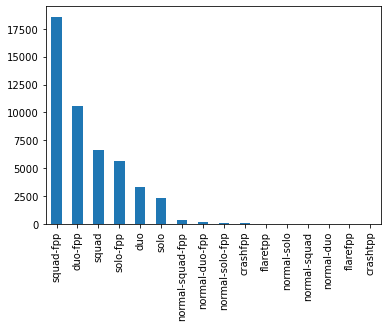

In [10]:
# 16 different match types.
print(df['matchType'].unique())
df.groupby('matchId')['matchType'].first().value_counts().plot.bar();

<p style="color:blue">Did we need to remove solo game? </p>


In [11]:
# Putting matches into categories based on different crateria. 
standard = ['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo']
custom = [i for i in set(df['matchType']) if i not in standard]

fpp = [i for i in set(df['matchType']) if 'fpp' in i]
tpp = [i for i in set(df['matchType']) if i not in fpp]

solo = [i for i in set(df['matchType']) if 'solo' in i]
duo = [i for i in set(df['matchType']) if 'duo' in i or 'crash' in i]
squad = [i for i in set(df['matchType']) if 'squad' in i or 'flare' in i]

# Making the new categories as new columns.
df['mode_category'] = df['matchType'].apply(lambda x: 'standard' if x in standard else 'custom')
df['game_angle'] = df['matchType'].apply(lambda x: 'fpp' if x in fpp else 'tpp')
df['game_mode'] = df['matchType'].apply(lambda x: 'solo' if x in solo else 'duo' if x in duo else 'squad')

<p style="color:blue">Is there a more efficient way than df.apply in pandas/numpy? </p>


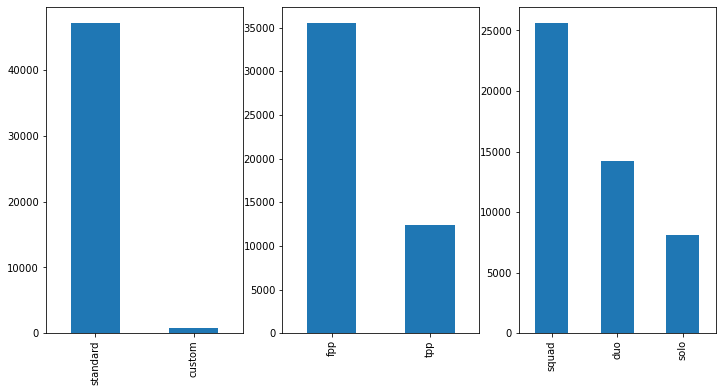

In [12]:
# Plot match counts based on different categories of match types. 
fig, ax = plt.subplots(1, 3, figsize=(12, 6))

df.groupby('matchId')['mode_category'].first().value_counts().plot.bar(ax=ax[0]);

df.groupby('matchId')['game_angle'].first().value_counts().plot.bar(ax=ax[1]);

df.groupby('matchId')['game_mode'].first().value_counts().plot.bar(ax=ax[2]);

Text(0.5, 1.0, 'Total Players')

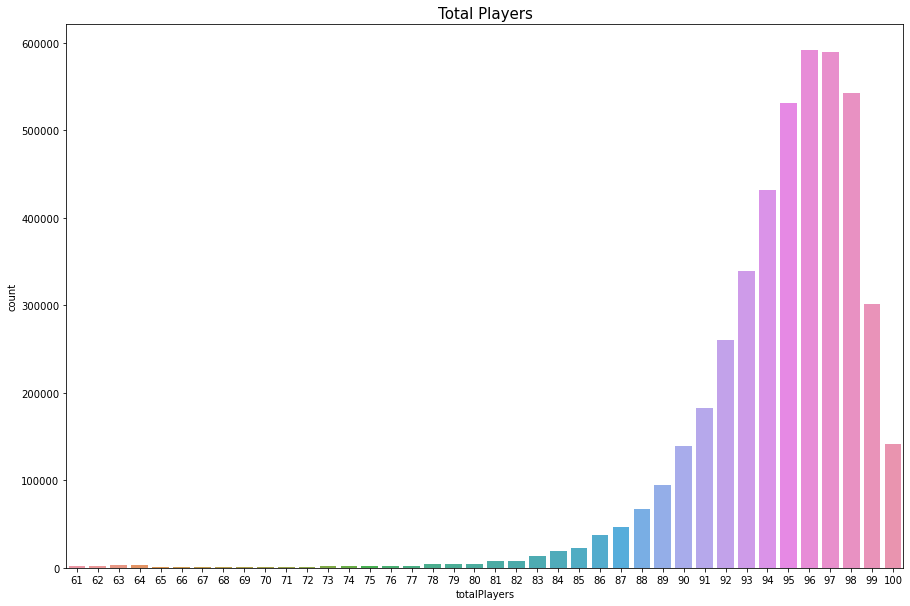

In [13]:
# Most games were played with almost full player capacity. Mode is 96
df['totalPlayers'] = df.groupby('matchId')['matchId'].transform('count')
plt.figure(figsize=(15,10))
data = df[df['totalPlayers'] > 60]
sns.countplot(x='totalPlayers', data=data)
plt.title("Total Players",fontsize=15)

#### NOTES:

In below section, the incoherent group sizes were found. e.g. squads are up to 4 players, but there are groups that had more than 4, and the same was found with duos and solos. 

Given the time limitation, without deeper knowledge of the game and the game security/fair-play governance implemented by the game producer, it's hard to tell if they are legitimate, or invalid due to reasons such as cheating players, system glitch, issue with data recording, or issue with data extraction. As a result, I decide to keep them, pending further investigation.

<p style="color:blue">In practice, should we consider models for different match type? </p>


In [14]:
count_squad = df.loc[df['game_mode'] == 'squad'].groupby('matchId')['groupId'].value_counts()
count_squad = count_squad[count_squad > 4]
count_squad

matchId         groupId       
0000a43bce5eec  236ab9e9c081b9    6
                909fe185a8cdec    6
                97364d4199bf30    6
                7bd08592bb25e2    5
                9cf70fed874fa1    5
                                 ..
fffe92232706aa  6a15aa65d8f03c    7
                d8fa9cfd6f9560    7
                c8e95cc6c06d41    6
                557b644bbbc518    5
                abc744463b2dd4    5
Name: groupId, Length: 110821, dtype: int64

In [15]:
count_duo = df.loc[df['game_mode'] == 'duo'].groupby('matchId')['groupId'].value_counts()
count_duo = count_duo[count_duo > 2]
count_duo

matchId         groupId       
0003b92987589e  5f526943ee0256    4
                66d6ea30bea7de    4
                f4327a7b8ff7c5    4
                b4468be264a790    3
                fc614329ca54f2    3
                                 ..
fffb576fad6509  e490c78c3eef10    4
                8d5d54e9e9c822    3
fffe721f841f85  017c151a1eed2d    4
                49ff9289213b44    3
                6eff3e84db6f8c    3
Name: groupId, Length: 49692, dtype: int64

In [16]:
count_solo = df.loc[df['game_mode'] == 'solo'].groupby('matchId')['groupId'].value_counts()
count_solo = count_solo[count_solo > 1]
count_solo

matchId         groupId       
0002912fe5ed71  47f731a76523d0    3
                64b74fda2527e0    2
00086e740a5804  df467dfe9cd507    3
                e1f7bd852a3cf4    2
001616ed5da99b  cd7f913d7f7883    3
                                 ..
fffe53015be300  07b6286649f1e5    2
                1066a39baa9527    2
                69ca668579667b    2
                903bae56fc1f29    2
                9512eb0b2c0d24    2
Name: groupId, Length: 17404, dtype: int64

## PART 1 (2): EDA ON INDIVIDUAL PLAYERS

<AxesSubplot:title={'center':'Kills per Player'}, xlabel='kills', ylabel='count'>

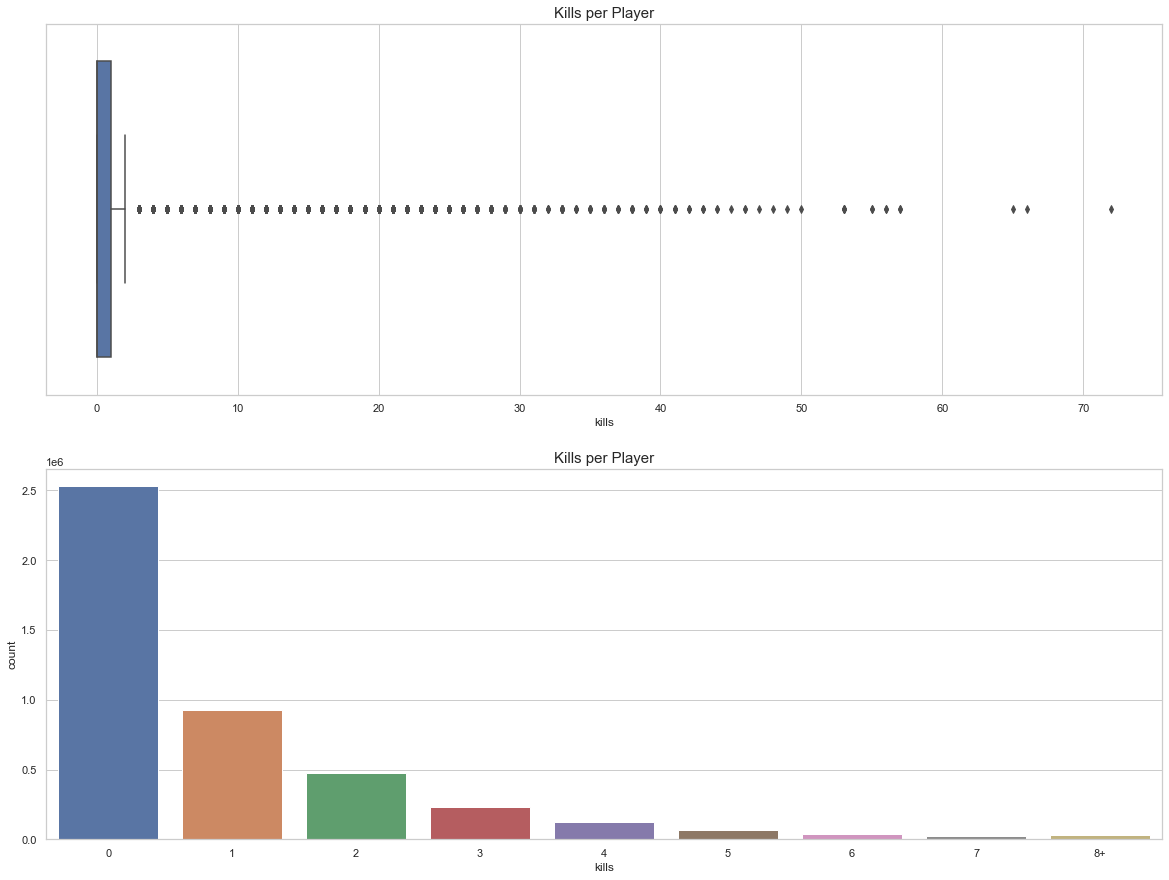

<Figure size 1080x720 with 0 Axes>

In [17]:
# Most players made 0 kill.
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(2, 1, figsize=(20, 15))

ax[0].set_title("Kills per Player", fontdict = {'fontsize':15})
sns.boxplot(x=df["kills"], ax=ax[0])

ax[1].set_title("Kills per Player", fontdict = {'fontsize':15})
data = df.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(x=data['kills'].astype('str').sort_values(), ax=ax[1])

<AxesSubplot:title={'center':'Damage Dealt by 0 killers'}, xlabel='damageDealt'>

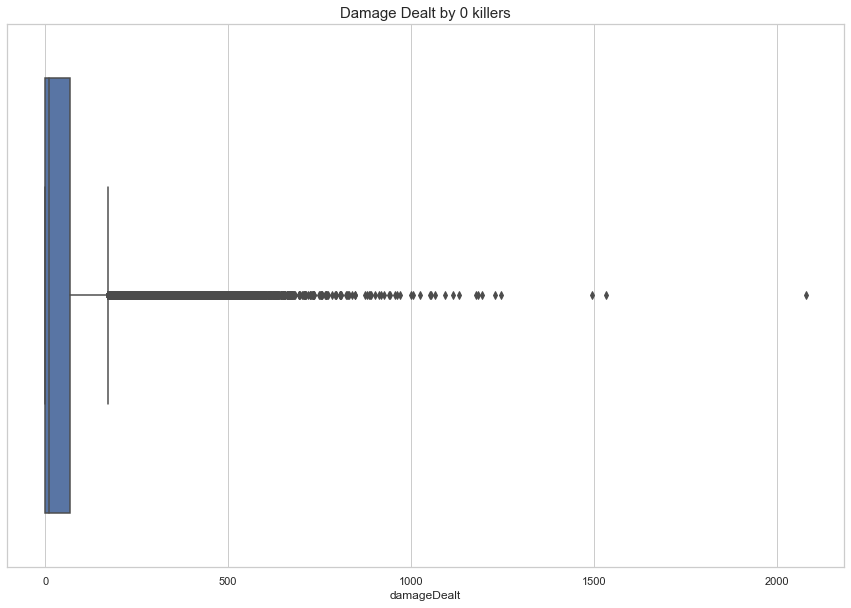

In [18]:
# Most 0 kill players managed to inflict some damages.
data = df.copy()
data = data[data['kills']==0]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers", fontsize=15)
sns.boxplot(x=data['damageDealt'])

In [19]:
# Found some very lucky players, who could be free riders or cheaters.
print('players won without kills: ', len(df[df['winPlacePerc']==1]), len(df[df['winPlacePerc']==1])/len(df))

data = data[data['damageDealt']==0]
print('players won without damage: ', len(data[data['winPlacePerc']==1]), len(data[data['winPlacePerc']==1])/len(df))

players won without kills:  127573 0.0286876490623045
players won without damage:  4709 0.0010589242193441552


<AxesSubplot:title={'center':'Kill Count_Custom Modes'}, xlabel='kills', ylabel='count'>

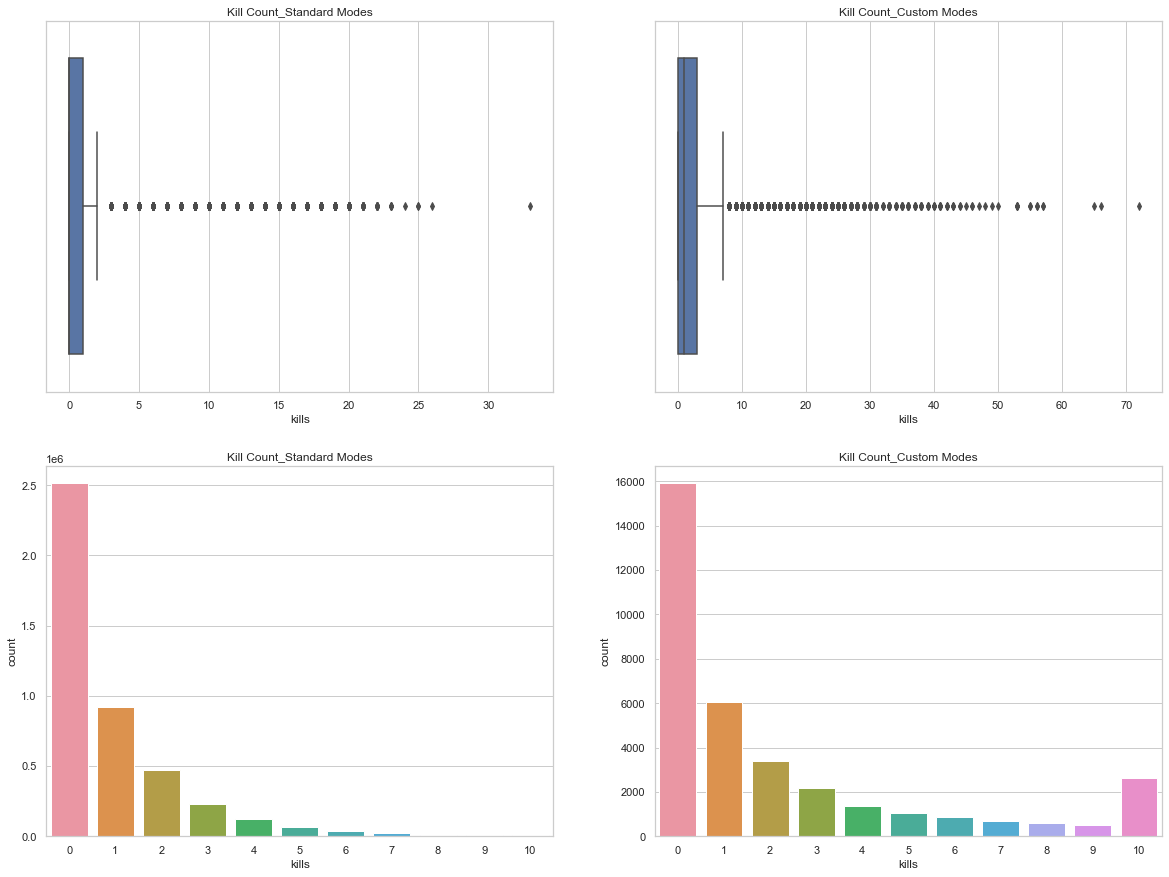

In [20]:
# Players in custom/special modes clearly have higher kill counts.
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

ax[0,0].title.set_text("Kill Count_Standard Modes")
data = df[df['mode_category'] == 'standard'].copy()
sns.boxplot(x=data['kills'].sort_values(),ax=ax[0,0])

ax[0,1].title.set_text("Kill Count_Custom Modes")
data1 = df[df['mode_category'] == 'custom'].copy()
sns.boxplot(x=data1['kills'].sort_values(),ax=ax[0,1])

ax[1,0].title.set_text("Kill Count_Standard Modes")
data.loc[data['kills'] > 10] = 10
sns.countplot(x=data['kills'].sort_values(),ax=ax[1,0])

ax[1,1].title.set_text("Kill Count_Custom Modes")
data1.loc[data1['kills'] > 10] = 10
sns.countplot(x=data1['kills'].sort_values(),ax=ax[1,1])

            amin  amax      mean
game_angle                      
fpp            0    66  0.934213
tpp            0    72  0.896970


<AxesSubplot:title={'center':'Kill Count_Third Person'}, xlabel='kills', ylabel='count'>

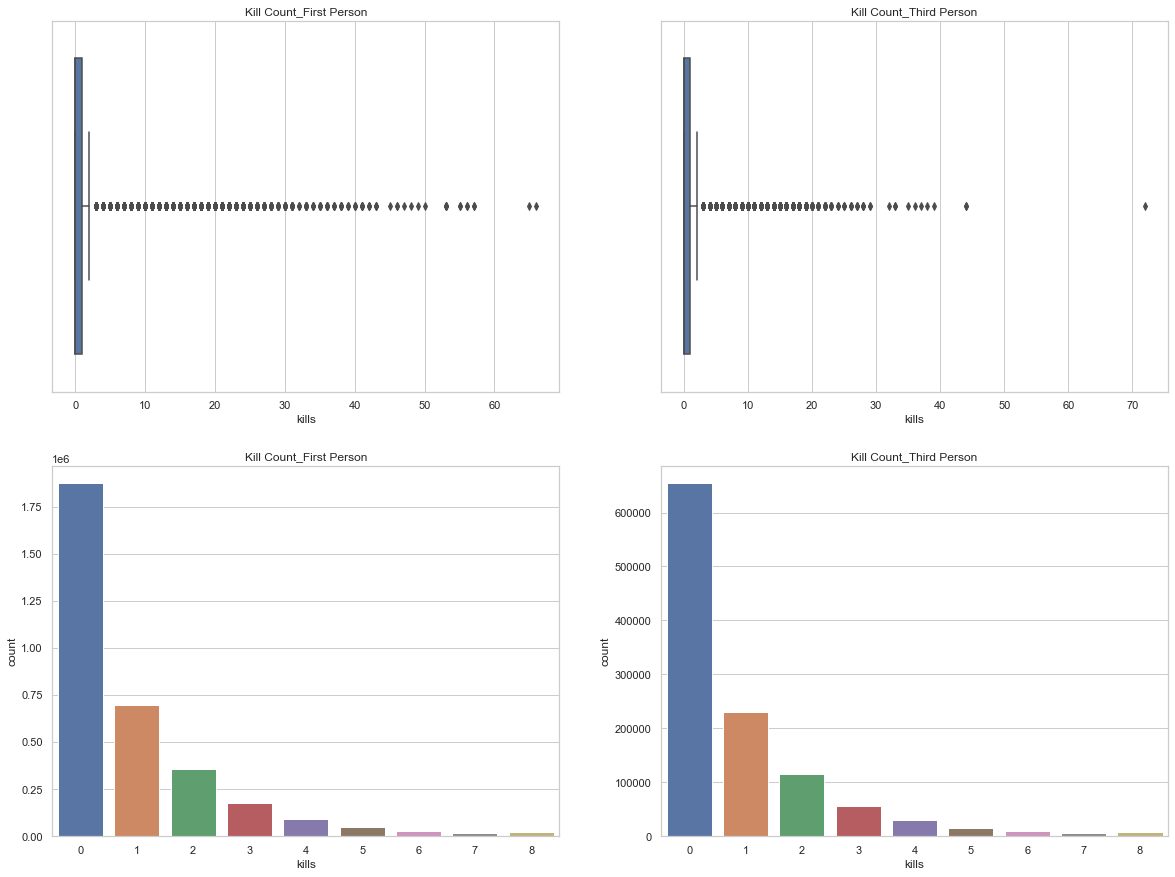

In [21]:
# Visually it seems like first person angle yields slightly higher kill counts. Note the outlier >70 in third person mode.
print(df.groupby('game_angle')['kills'].agg([np.min, np.max, np.mean]))

fig, ax = plt.subplots(2, 2, figsize=(20, 15))

ax[0,0].title.set_text("Kill Count_First Person")
data = df[df['game_angle'] == 'fpp'].copy()
sns.boxplot(x=data['kills'].sort_values(),ax=ax[0,0])

ax[0,1].title.set_text("Kill Count_Third Person")
data1 = df[df['game_angle'] == 'tpp'].copy()
sns.boxplot(x=data1['kills'].sort_values(),ax=ax[0,1])

ax[1,0].title.set_text("Kill Count_First Person")
data.loc[data['kills'] > 8] = 8
sns.countplot(x=data['kills'].sort_values(),ax=ax[1,0])

ax[1,1].title.set_text("Kill Count_Third Person")
data1.loc[data1['kills'] > 8] = 8
sns.countplot(x=data1['kills'].sort_values(),ax=ax[1,1])

           amin  amax      mean
game_mode                      
duo           0    57  0.925790
solo          0    66  0.936858
squad         0    72  0.920609


<AxesSubplot:title={'center':'Kill Count_Solo'}, xlabel='kills', ylabel='count'>

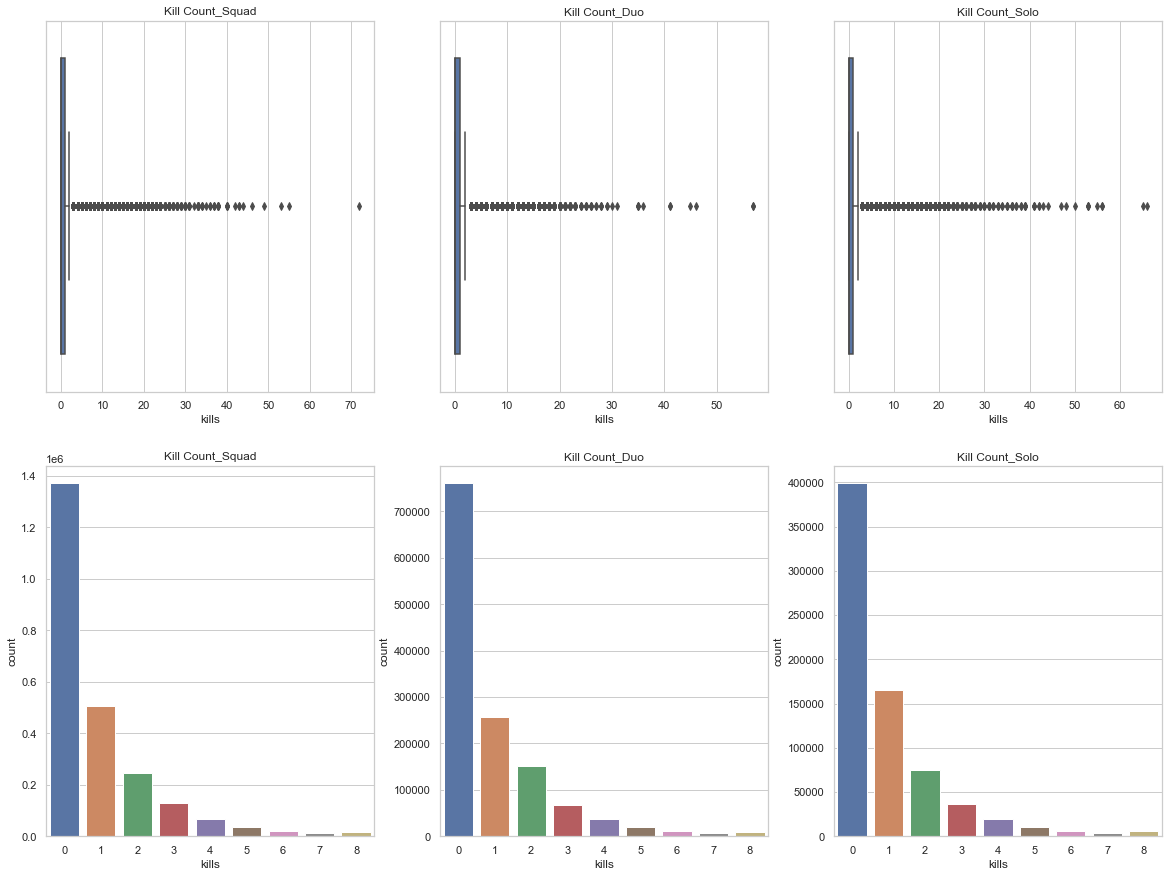

In [22]:
# It seems like solo players generally have slightly higher kills than grouped players. Note the outlier >70 in squad.
print(df.groupby('game_mode')['kills'].agg([np.min, np.max, np.mean]))

fig, ax = plt.subplots(2, 3, figsize=(20, 15))

ax[0,0].title.set_text("Kill Count_Squad")
data = df[df['game_mode'] == 'squad'].copy()
sns.boxplot(x=data['kills'].sort_values(),ax=ax[0,0])

ax[0,1].title.set_text("Kill Count_Duo")
data1 = df[df['game_mode'] == 'duo'].copy()
sns.boxplot(x=data1['kills'].sort_values(),ax=ax[0,1])

ax[0,2].title.set_text("Kill Count_Solo")
data2 = df[df['game_mode'] == 'solo'].copy()
sns.boxplot(x=data2['kills'].sort_values(),ax=ax[0,2])

ax[1,0].title.set_text("Kill Count_Squad")
data.loc[data['kills'] > 8] = 8
sns.countplot(x=data['kills'].sort_values(),ax=ax[1,0])

ax[1,1].title.set_text("Kill Count_Duo")
data1.loc[data1['kills'] > 8] = 8
sns.countplot(x=data1['kills'].sort_values(),ax=ax[1,1])

ax[1,2].title.set_text("Kill Count_Solo")
data2.loc[data2['kills'] > 8] = 8
sns.countplot(x=data2['kills'].sort_values(),ax=ax[1,2])

## PART 1 (3): EDA ON FEATURES VS winPlacePerc (INDIVIDUAL)

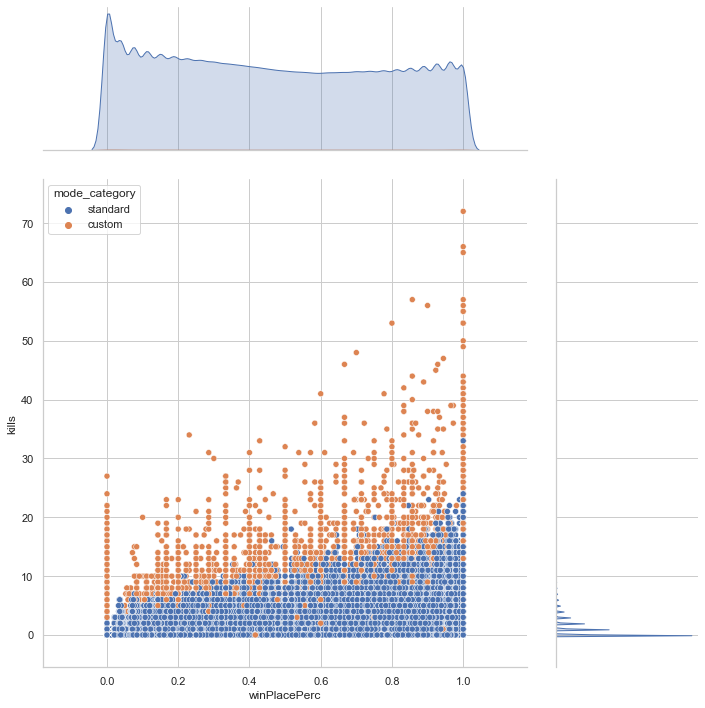

In [24]:
# kill counts are positively correlated to winPlacePerc.
sns.jointplot(x="winPlacePerc", y="kills", data=df, height=10, ratio=3, hue="mode_category")

Text(0.5, 1.0, 'Win vs swimDistance')

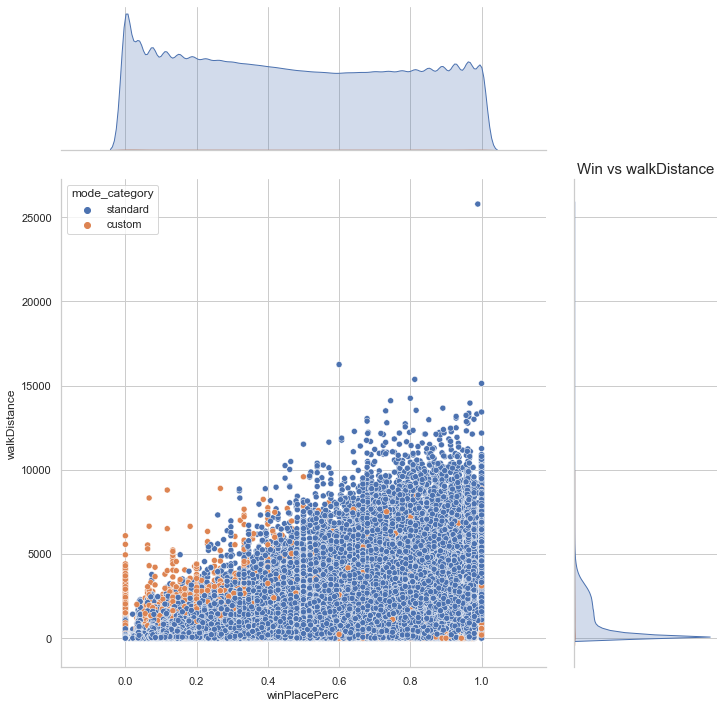

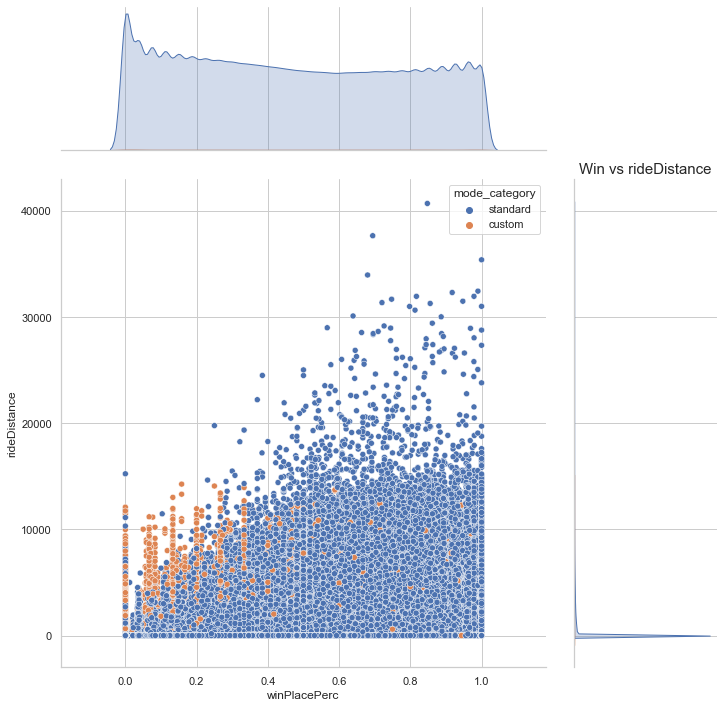

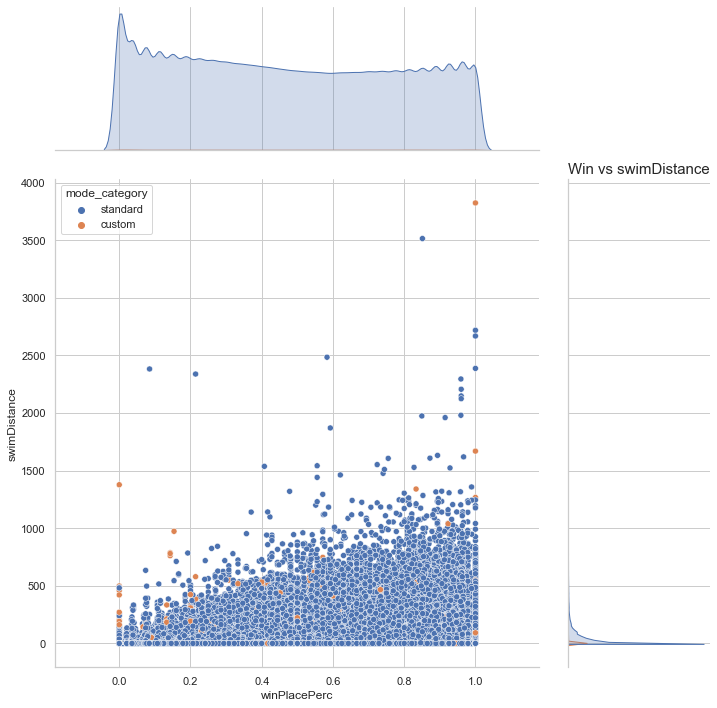

In [25]:
# All 3 types of travel distances are positive related to winning.
# Swimming yields the least distance.
sns.jointplot(x="winPlacePerc", y="walkDistance",data=df, height=10, ratio=3, hue="mode_category")
plt.title("Win vs walkDistance", fontsize=15)

sns.jointplot(x="winPlacePerc", y="rideDistance",data=df, height=10, ratio=3, hue="mode_category")
plt.title("Win vs rideDistance", fontsize=15)

sns.jointplot(x="winPlacePerc", y="swimDistance",data=df, height=10, ratio=3, hue="mode_category")
plt.title("Win vs swimDistance", fontsize=15)

Walk Distance:  mean:  1154.217859096256 .99 quantile:  4396.0 maximum:  25780.0
Swim Distance:  mean:  4.509322451307294 .99 quantile:  123.0 maximum:  3823.0
Ride Distance:  mean:  606.1156691540683 .99 quantile:  6966.0 maximum:  40710.0


<AxesSubplot:title={'center':'Win vs rideDistance'}, xlabel='rideDistance', ylabel='winPlacePerc'>

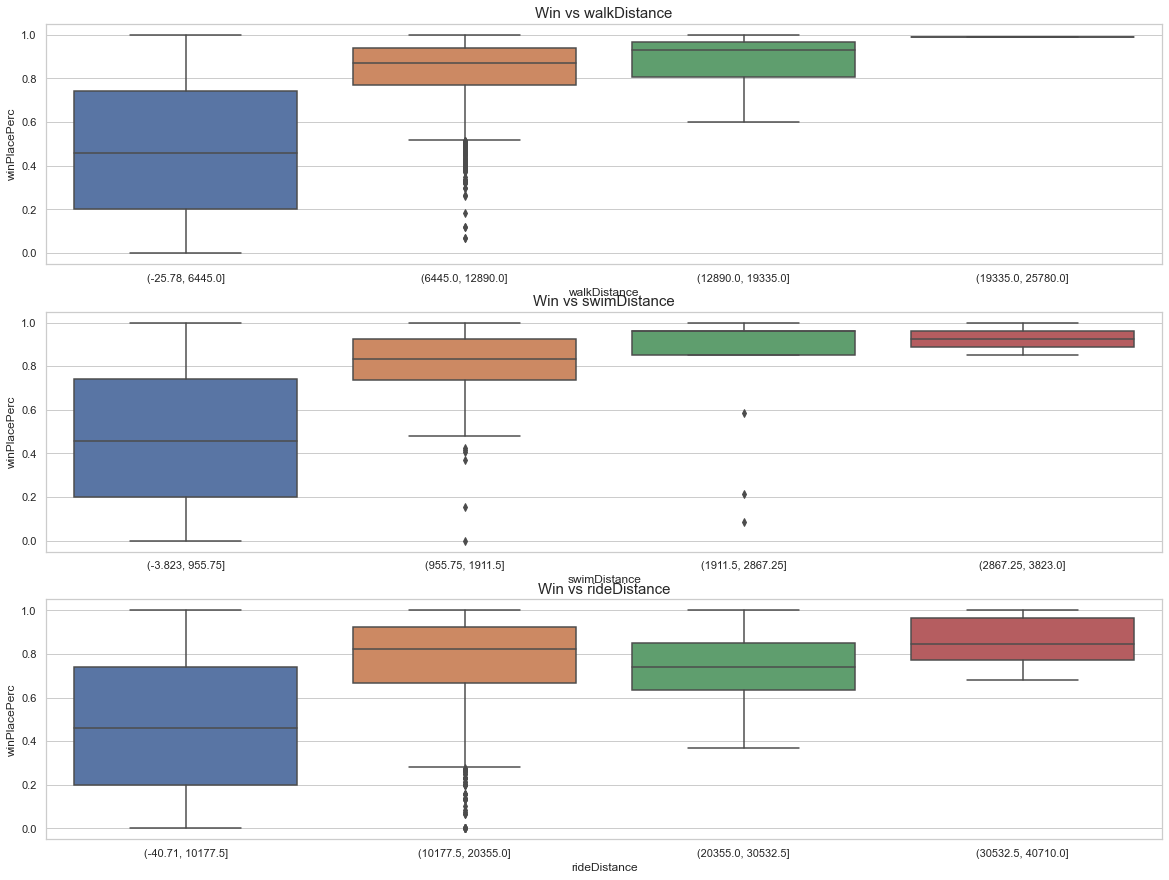

In [26]:
print('Walk Distance: ', 'mean: ', df['walkDistance'].mean(), '.99 quantile: ', df['walkDistance'].quantile(0.99), 'maximum: ', df['walkDistance'].max())
print('Swim Distance: ', 'mean: ', df['swimDistance'].mean(), '.99 quantile: ', df['swimDistance'].quantile(0.99), 'maximum: ', df['swimDistance'].max()) 
print('Ride Distance: ', 'mean: ', df['rideDistance'].mean(), '.99 quantile: ', df['rideDistance'].quantile(0.99), 'maximum: ', df['rideDistance'].max()) 

fig, ax = plt.subplots(3, 1, figsize=(20, 15))

ax[0].set_title("Win vs walkDistance", fontdict = {'fontsize':15})
walk = df.copy()
walk['walkDistance'] = pd.cut(walk['walkDistance'], 4)
sns.boxplot(x="walkDistance", y="winPlacePerc", data=walk, ax=ax[0])

ax[1].set_title("Win vs swimDistance", fontdict = {'fontsize':15})
swim = df.copy()
swim['swimDistance'] = pd.cut(swim['swimDistance'], 4)
sns.boxplot(x="swimDistance", y="winPlacePerc", data=swim, ax=ax[1])

ax[2].set_title("Win vs rideDistance", fontdict = {'fontsize':15})
ride = df.copy()
ride['rideDistance'] = pd.cut(swim['rideDistance'], 4)
sns.boxplot(x="rideDistance", y="winPlacePerc", data=ride, ax=ax[2])


<p style="color:blue">Is walk distance a useful feature? </p>


<AxesSubplot:title={'center':'Heals and Boosts'}, xlabel='boosts', ylabel='winPlacePerc'>

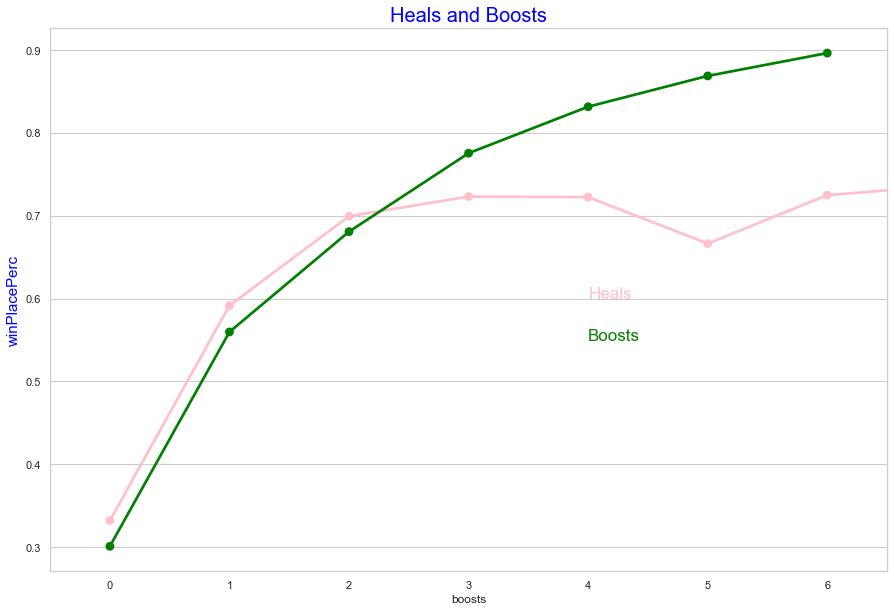

In [27]:
# There's a strong positive correlation between heals and boots used vs winPlacePerc.
plt.figure(figsize=(15,10))
plt.text(4,0.6,'Heals',color='pink',fontsize = 17)
plt.text(4,0.55,'Boosts',color='green',fontsize = 17)
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals and Boosts',fontsize = 20,color='blue')

data = df.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

sns.pointplot(x='heals',y='winPlacePerc',data=data,color='pink',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='green',alpha=0.8)

Text(0.5, 1.0, 'Assists and Revives')

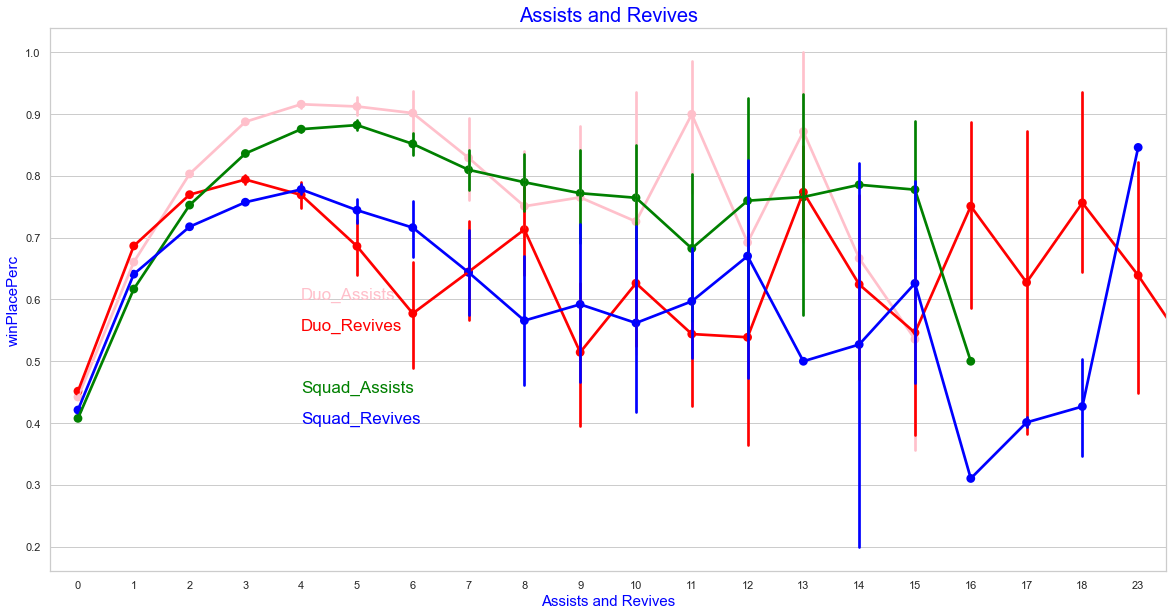

In [28]:
# There's a strong posistive correlation between assists and revives vs winPlacePerc, up to 4 times each. 
#Beyond this point, win rate variance increases, and the mean of the win rate decreases as the times increase.
#Assists seem generally more "useful" towards the winning result, and high revive volumes could mean that the teammates are not skilled.
plt.subplots(figsize=(20,10))

duo = df[df['game_mode'] == 'duo']
squad = df[df['game_mode'] == 'squad']
solo = df[df['game_mode'] == 'solo']

sns.pointplot(x='assists',y='winPlacePerc',data=duo,color='pink',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=duo,color='red',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=squad,color='green',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=squad,color='blue',alpha=0.8)

plt.text(4,0.6,'Duo_Assists',color='pink',fontsize = 17)
plt.text(4,0.55,'Duo_Revives',color='red',fontsize = 17)
plt.text(4,0.45,'Squad_Assists',color='green',fontsize = 17)
plt.text(4,0.4,'Squad_Revives',color='blue',fontsize = 17)
plt.xlabel('Assists and Revives',fontsize = 15,color='blue')
plt.ylabel('winPlacePerc',fontsize = 15,color='blue')
plt.title('Assists and Revives',fontsize = 20,color='blue')

Text(0.5, 1.0, 'Solo vs Duo vs Squad Kills')

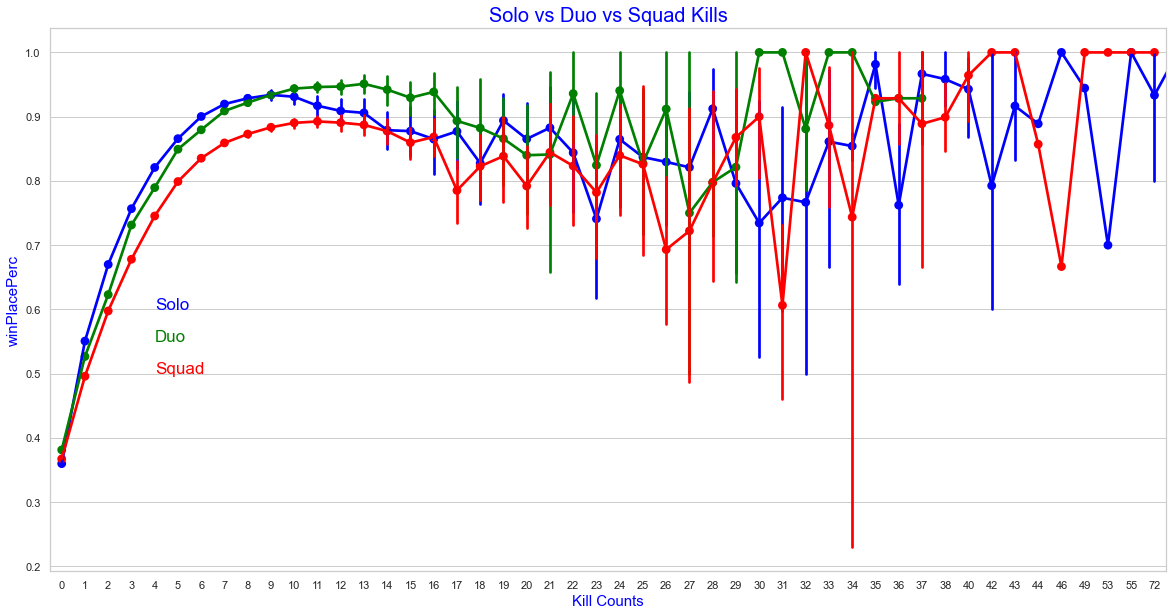

In [29]:
# There's clearly a strong positive correlation between kills vs winPlacePerc, up to around 10 kills. 
# Beyond this, win rate could vary a lot.
# In the lower range of kill counts, the more people in a group, the lower correlation between individual kills and final wins.
plt.subplots(figsize =(20,10))

sns.pointplot(x='kills',y='winPlacePerc',data=solo,color='blue',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duo,color='green',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squad,color='red',alpha=0.8)
plt.text(4,0.6,'Solo',color='blue',fontsize = 17)
plt.text(4,0.55,'Duo',color='green',fontsize = 17)
plt.text(4,0.5,'Squad',color='red',fontsize = 17)
plt.xlabel('Kill Counts',fontsize = 15,color='blue')
plt.ylabel('winPlacePerc',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')

<AxesSubplot:>

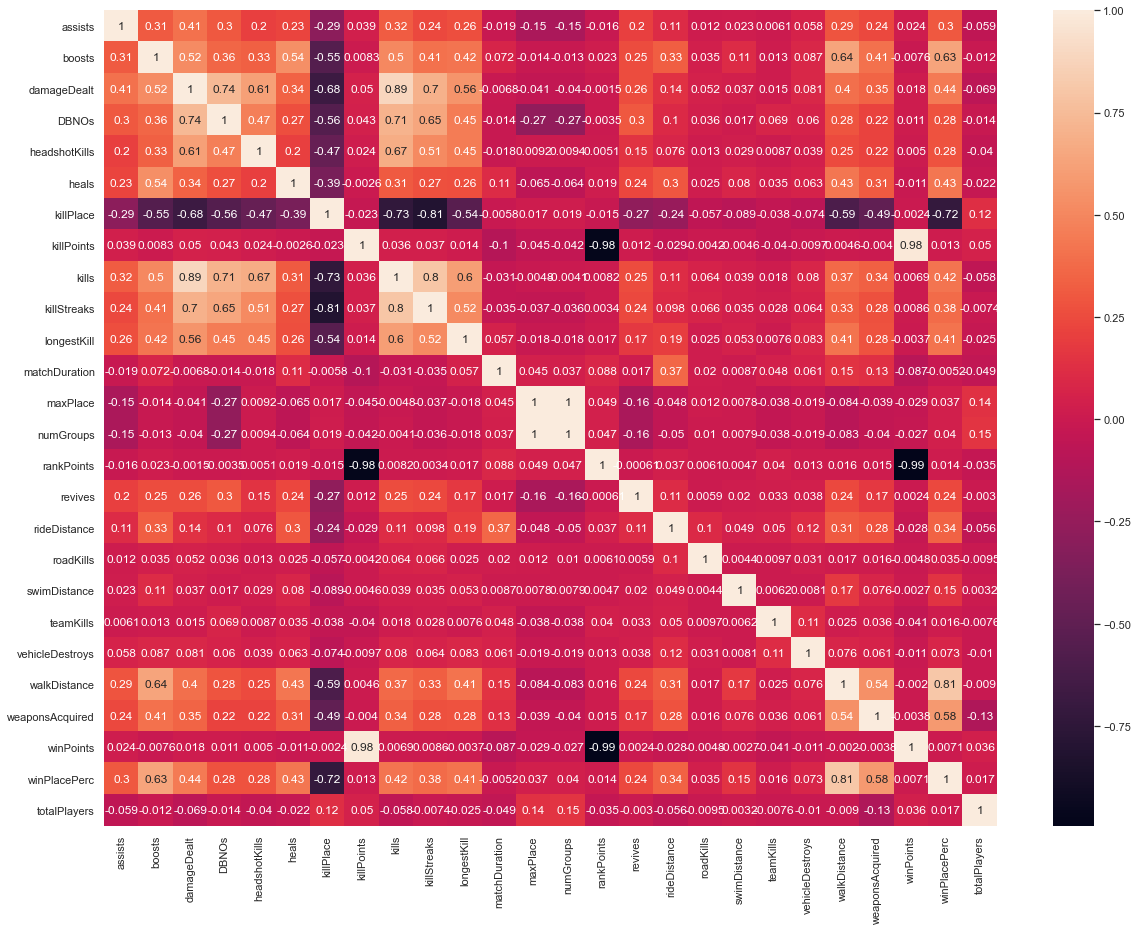

In [30]:
corr = df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True, fmt='.2g')

<p style="color:blue">How do you select features?</p>


<p style="color:blue">How do you remove highly correlated features?</p>


## PART 1 (4): FEATURE ENGEERING

In [31]:
# As the goal of this project is to predict win (winPlacePerc == 1) and lose (winPlacePerc <> 1)
# We need to convert the winPlacePerc into a binary classifier.
df['win'] = df['winPlacePerc'].apply(lambda x: 1 if x ==1 else 0)
df['win'].value_counts()

0    4319393
1     127573
Name: win, dtype: int64

In [32]:
df['totalDistance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']
df['killperDistance'] = df['kills']/(df['totalDistance']+1)
df['killperDistance'] = df['killperDistance'].fillna(0)
df['killperDistance'].value_counts().sort_index(ascending=False)

43.000000          1
38.000000          1
36.000000          2
35.000000          1
31.000000          2
              ...   
0.000033           1
0.000032           1
0.000031           1
0.000031           1
0.000000     2529722
Name: killperDistance, Length: 303412, dtype: int64

In [33]:
df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)
df['headshot_rate'].value_counts().sort_index(ascending=False)

1.000000     254068
0.958333          1
0.952381          1
0.951220          1
0.944444          3
             ...   
0.043478          2
0.041667          3
0.038462          2
0.037037          1
0.000000    3696116
Name: headshot_rate, Length: 263, dtype: int64

<p style="color:blue">Do you know other missing imputation methods?</p>


In [34]:
# As we observed below, the players in the same group share the same winPlacePerc.
# Hence our goal is to predict the group winning probability, rather than individual players.
# Features based on groups will need to be generated later.
df.loc[df['groupId'] == 'e26ac84bdf7cef',['groupId','winPlacePerc']]

,groupId,winPlacePerc
1721011,e26ac84bdf7cef,0.4815
3076207,e26ac84bdf7cef,0.4815
4446963,e26ac84bdf7cef,0.4815


<p style="color:blue">Will group-based features cause problems in production?</p>


In [35]:
df['totalBoostHeal'] = df['boosts'] + df['heals']
df['totalAssistRevive'] = df['assists'] + df['revives']
df['groupPeople'] = df.groupby('groupId')['Id'].transform('count')
df['groupDistance'] = df.groupby('groupId')['totalDistance'].transform('sum')
df['groupKills'] = df.groupby('groupId')['kills'].transform('sum')
df['groupBoostHeal'] = df.groupby('groupId')['totalBoostHeal'].transform('sum')
df['groupAssistRevive'] = df.groupby('groupId')['totalAssistRevive'].transform('sum')
df['groupAssists'] = df.groupby('groupId')['assists'].transform('sum')
df['groupDamages'] = df.groupby('groupId')['damageDealt'].transform('sum')
df['groupDBNOs'] = df.groupby('groupId')['DBNOs'].transform('sum')
df['grouprevives'] = df.groupby('groupId')['revives'].transform('sum')
df['groupRoadKills'] = df.groupby('groupId')['roadKills'].transform('sum')
df['groupTeamKills'] = df.groupby('groupId')['teamKills'].transform('sum')
df['groupVehicle'] = df.groupby('groupId')['vehicleDestroys'].transform('sum')
df['groupWeapons'] = df.groupby('groupId')['weaponsAcquired'].transform('sum')
df['groupLongestKill'] = df.groupby('groupId')['longestKill'].transform('max')
df['groupMaxStreaks'] = df.groupby('groupId')['killStreaks'].transform('max')
df['groupMaxKills'] = df.groupby('groupId')['kills'].transform('max')
df['groupMaxDistance'] = df.groupby('groupId')['totalDistance'].transform('max')

In [36]:
# Normalizing the kills and damages based on total players joined in a match, to have a more accuate scale.
# Given the time limitation, there were only 2 type of features (kills and damages) that were normalized. Other features should be looked into as well.
df['killsNorm'] = df['kills']*((100-df['totalPlayers'])/100 + 1)
df['damageDealtNorm'] = df['damageDealt']*((100-df['totalPlayers'])/100 + 1)
df['groupKillsNorm'] = df['groupKills']*((100-df['totalPlayers'])/100 + 1)
df['groupDamagesNorm'] = df['groupDamages']*((100-df['totalPlayers'])/100 + 1)
df[['totalPlayers', 'kills', 'killsNorm', 'damageDealt', 'damageDealtNorm', 'groupKills', 'groupKillsNorm', 'groupDamages', 'groupDamagesNorm']].head(5)

,totalPlayers,kills,killsNorm,damageDealt,damageDealtNorm,groupKills,groupKillsNorm,groupDamages,groupDamagesNorm
0,96,0,0.00,0.00,0.0000,4,4.16,408.75,425.1000
1,91,0,0.00,91.47,99.7023,4,4.36,571.27,622.6843
2,98,0,0.00,68.00,69.3600,2,2.04,214.60,218.8920
3,91,0,0.00,32.90,35.8610,0,0.00,32.90,35.8610
4,97,1,1.03,100.00,103.0000,1,1.03,100.00,103.0000


<p style="color:blue">Can you explain this step?</p>


<p style="color:blue">Features based on match type?</p>


## PART 1 (5): EDA ON PLAYERS AS A GROUP

Text(0.5, 1.0, 'Win vs Group Distance')

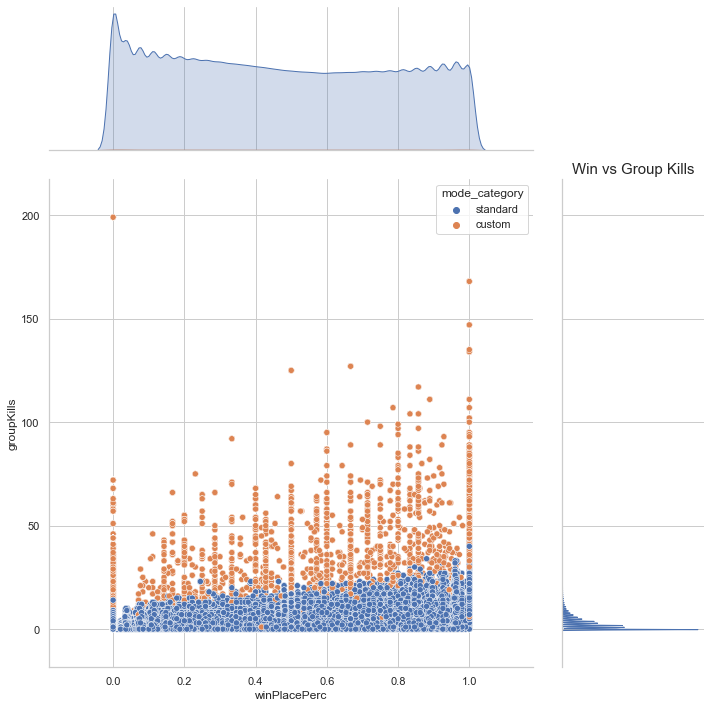

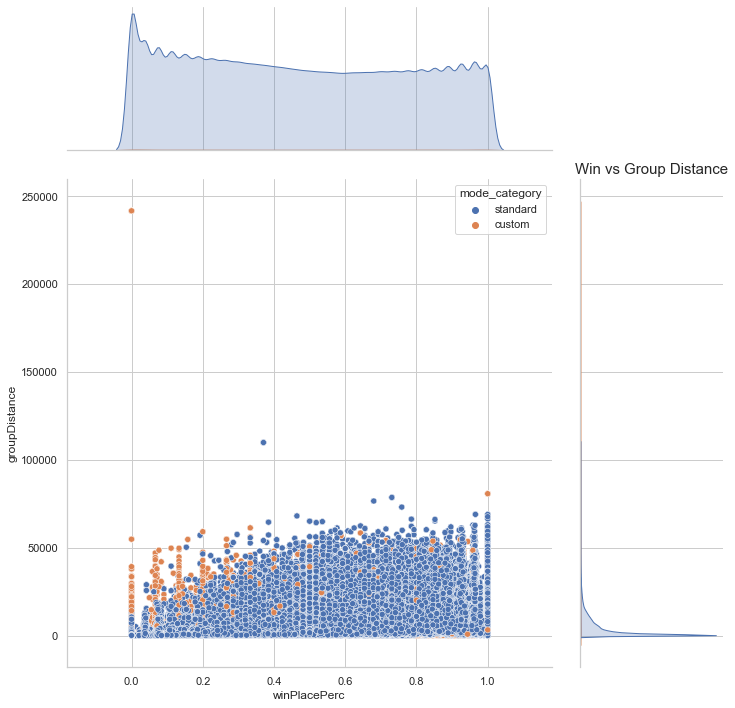

In [37]:
# Total kills in a group are positively correlated to chance of winning.
sns.jointplot(x="winPlacePerc", y="groupKills",data=df, height=10, ratio=3, hue="mode_category")
plt.title("Win vs Group Kills", fontsize=15)

sns.jointplot(x="winPlacePerc", y="groupDistance",data=df, height=10, ratio=3, hue="mode_category")
plt.title("Win vs Group Distance", fontsize=15)

Text(0.5, 1.0, 'Win vs Normalized Group Kills')

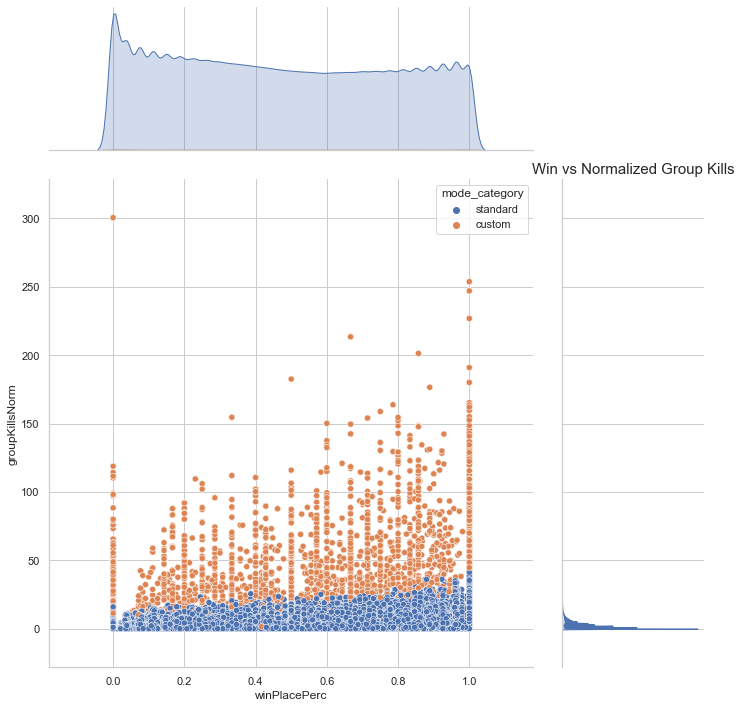

In [38]:
# Normalized group kills vs winPlacePerc
sns.jointplot(x="winPlacePerc", y="groupKillsNorm",data=df, height=10, ratio=3, hue="mode_category")
plt.title("Win vs Normalized Group Kills", fontsize=15)

## PART 1 (6): CLEANSE DATA, REMOVE EXTREME OUTLIERS

In [39]:
# Give total NaN values per feature. 
pd.set_option('display.max_rows', df.shape[1]+1)
df.isnull().sum()

Id                   0
groupId              0
matchId              0
assists              0
boosts               0
damageDealt          0
DBNOs                0
headshotKills        0
heals                0
killPlace            0
killPoints           0
kills                0
killStreaks          0
longestKill          0
matchDuration        0
matchType            0
maxPlace             0
numGroups            0
rankPoints           0
revives              0
rideDistance         0
roadKills            0
swimDistance         0
teamKills            0
vehicleDestroys      0
walkDistance         0
weaponsAcquired      0
winPoints            0
winPlacePerc         1
mode_category        0
game_angle           0
game_mode            0
totalPlayers         0
win                  0
totalDistance        0
killperDistance      0
headshot_rate        0
totalBoostHeal       0
totalAssistRevive    0
groupPeople          0
groupDistance        0
groupKills           0
groupBoostHeal       0
groupAssist

In [40]:
# As there is only 1 row that contains NaN value, we can simply drop it
df.dropna(axis=0, how='any', inplace=True)

In [41]:
# It's impossible for players to not moving at all and accquired more than 20 weapons and killed many enemies. -- Cheaters
df[(df['kills'] > df['kills'].quantile(.9999)) & (df['totalDistance'] ==0) & (df['weaponsAcquired'] > 20)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,mode_category,game_angle,game_mode,totalPlayers,win,totalDistance,killperDistance,headshot_rate,totalBoostHeal,totalAssistRevive,groupPeople,groupDistance,groupKills,groupBoostHeal,groupAssistRevive,groupAssists,groupDamages,groupDBNOs,grouprevives,groupRoadKills,groupTeamKills,groupVehicle,groupWeapons,groupLongestKill,groupMaxStreaks,groupMaxKills,groupMaxDistance,killsNorm,damageDealtNorm,groupKillsNorm,groupDamagesNorm
125753,8f02d08857012d,df5224a39204b0,196a649203b0a3,5,0,2918.0,0,9,22,2,1000,25,4,151.60,1796,normal-duo-fpp,9,8,-1,0,0.0,0,0.0,0,0,0.0,35,1500,0.8750,custom,fpp,duo,16,0,0.0,25.0,0.360000,22,5,2,1423.00,41,26,12,12,4768.0,0,0,0,0,0,82,157.60,4,25,1423.0,46.00,5369.12,75.44,8773.120
269922,7bfaeb8870182a,6b0360ae91b260,6680c7c3d17d48,10,3,2397.0,0,7,11,11,0,24,1,52.87,1800,normal-squad,15,15,1500,0,0.0,0,0.0,0,0,0.0,53,0,0.7857,custom,tpp,squad,47,0,0.0,24.0,0.291667,14,10,6,119.96,107,26,43,43,10256.5,0,0,0,1,0,224,61.73,4,28,50.3,36.72,3667.41,163.71,15692.445
422093,96751e22e536ac,31860593dae698,bc10cc08f1f56a,7,0,2891.0,0,3,4,1,1000,30,2,980.70,1792,normal-duo-fpp,7,6,-1,0,0.0,0,0.0,0,0,0.0,55,1500,1.0000,custom,fpp,duo,7,1,0.0,30.0,0.100000,4,7,1,0.00,30,4,7,7,2891.0,0,0,0,0,0,55,980.70,2,30,0.0,57.90,5579.63,57.90,5579.630
863538,4c8ce643f804d3,9c47d0cd9271e4,5ce0dc1e5be2ae,11,0,2733.0,0,7,0,1,1000,26,4,24.59,898,normal-solo-fpp,15,11,-1,0,0.0,0,0.0,0,0,0.0,35,1500,1.0000,custom,fpp,solo,15,1,0.0,26.0,0.269231,0,11,2,0.00,35,0,12,12,3563.0,0,0,0,0,0,62,26.46,4,26,0.0,48.10,5056.05,64.75,6591.550
954479,be3de011801fc2,1a7eaf8f928083,fbb3e317403d7b,1,1,2353.0,25,16,9,1,0,26,3,136.60,1199,normal-squad-fpp,6,6,1500,0,0.0,0,0.0,0,0,0.0,23,0,1.0000,custom,fpp,squad,23,1,0.0,26.0,0.615385,10,1,4,834.60,49,32,27,17,5526.7,59,10,0,1,0,91,136.60,3,26,463.0,46.02,4164.81,86.73,9782.259
971763,8b017b42544bef,1542cc5a332c65,39c442628f5df5,5,0,2841.0,0,3,13,3,0,25,2,62.05,1796,normal-solo-fpp,9,6,1500,0,0.0,0,0.0,1,0,0.0,49,0,0.7500,custom,fpp,solo,11,0,0.0,25.0,0.120000,13,5,2,221.30,26,13,5,5,2901.7,0,0,0,1,0,55,62.05,2,25,221.3,47.25,5369.49,49.14,5484.213
1072014,3a18b07ff12cb0,f9181ba5930335,3eaaa2f7a360fe,8,0,2299.0,0,5,5,1,0,23,4,25.50,899,normal-squad-fpp,18,17,1500,0,0.0,0,0.0,0,0,0.0,35,0,0.8235,custom,fpp,squad,53,0,0.0,23.0,0.217391,5,8,3,0.00,32,5,11,11,3165.5,0,0,0,0,0,73,25.50,4,23,0.0,33.81,3379.53,47.04,4653.285
1150900,90f6df56893879,6f147f97471bcc,5921b55b9e96b5,3,0,2851.0,0,3,1,6,0,29,3,157.00,1799,normal-solo-fpp,16,14,1500,0,0.0,0,0.0,0,0,0.0,66,0,0.6667,custom,fpp,solo,16,0,0.0,29.0,0.103448,1,3,1,0.00,29,1,3,3,2851.0,0,0,0,0,0,66,157.00,3,29,0.0,53.36,5245.84,53.36,5245.840
1158891,b13885c80055c5,62c7f75a7a4d9f,cfa2775c9ef944,2,0,3110.0,0,4,7,3,1000,36,4,172.50,1797,normal-solo-fpp,37,22,-1,0,0.0,0,0.0,0,0,0.0,25,1500,0.5833,custom,fpp,solo,41,0,0.0,36.0,0.111111,7,2,3,256.20,72,14,9,9,6411.0,0,0,0,0,0,111,172.50,4,36,256.2,57.24,4944.90,114.48,10193.490
1358435,e4c109ce8a4baa,cd40d20d1a78ca,b41f2cc5244e17,8,0,3044.0,0,12,0,4,0,25,3,94.74,1799,normal-solo-fpp,8,6,1500,0,0.0,0,0.0,0,0,0.0,69,0,0.4286,custom,fpp,solo,12,0,0.0,25.0,0.480000,0,8,1,0.00,25,0,8,8,3044.0,0,0,0,0,0,69,94.74,3,25,0.0,47.00,5722.72,47.00,5722.720


In [42]:
df.drop(df[(df['kills'] > df['kills'].quantile(.9999)) & (df['totalDistance'] ==0) & (df['weaponsAcquired'] > 20)].index, inplace=True)

In [43]:
# It's impossible for players to ride a vehicle less than 10 meters and road killed many enemies. -- Cheaters
df[(df['roadKills'] > 5) & (df['rideDistance'] < 10)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,mode_category,game_angle,game_mode,totalPlayers,win,totalDistance,killperDistance,headshot_rate,totalBoostHeal,totalAssistRevive,groupPeople,groupDistance,groupKills,groupBoostHeal,groupAssistRevive,groupAssists,groupDamages,groupDBNOs,grouprevives,groupRoadKills,groupTeamKills,groupVehicle,groupWeapons,groupLongestKill,groupMaxStreaks,groupMaxKills,groupMaxDistance,killsNorm,damageDealtNorm,groupKillsNorm,groupDamagesNorm
471329,aa7e78882e667d,519d050ae0c496,df3223d5b94550,0,0,800.0,0,0,0,3,1144,8,4,0.000,1775,solo,71,60,-1,0,0.0415,8,244.800,0,0,5470.0,0,1536,0.5286,standard,tpp,solo,71,0,5714.8415,0.001400,0.0,0,0,1,5714.8415,8,0,0,0,800.0,0,0,8,0,0,0,0.000,4,8,5714.8415,10.32,1032.00,10.32,1032.00
2733926,c3e444f7d1289f,489dd6d1f2b3bb,4797482205aaa4,0,0,1246.0,0,0,0,1,1403,14,13,7.181,1456,solo,92,80,-1,0,0.0050,14,5.297,0,0,1277.0,0,1371,0.4286,standard,tpp,solo,92,0,1282.3020,0.010909,0.0,0,0,1,1282.3020,14,0,0,0,1246.0,0,0,14,0,0,0,7.181,13,14,1282.3020,15.12,1345.68,15.12,1345.68


In [44]:
df.drop(df[(df['roadKills'] > 5) & (df['rideDistance'] < 10)].index, inplace=True)

In [45]:
# It's highly unlikely for someone to walk more than 25000 meters in a game -- probably cheaters
df[df['walkDistance'] > df['walkDistance'].quantile(.999999)].sort_values(by='walkDistance', ascending=False)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,mode_category,game_angle,game_mode,totalPlayers,win,totalDistance,killperDistance,headshot_rate,totalBoostHeal,totalAssistRevive,groupPeople,groupDistance,groupKills,groupBoostHeal,groupAssistRevive,groupAssists,groupDamages,groupDBNOs,grouprevives,groupRoadKills,groupTeamKills,groupVehicle,groupWeapons,groupLongestKill,groupMaxStreaks,groupMaxKills,groupMaxDistance,killsNorm,damageDealtNorm,groupKillsNorm,groupDamagesNorm
497965,3304d0c68e27f5,503757159d22dd,ce88f9c8c35bdf,0,0,0.0,0,0,0,46,0,0,0,0.0,1889,solo-fpp,95,93,1520,0,0.0078,0,381.90,0,0,25780.0,0,0,0.9894,standard,fpp,solo,95,0,26161.9078,0.000000,0.0,0,0,1,26161.9078,0,0,0,0,0.00,0,0,0,0,0,0,0.0000,0,0,26161.9078,0.00,0.000,0.00,0.0000
1797162,7b9a750b17e9c6,2d00192e4029c5,6fe77402ddb0e1,0,0,0.0,0,0,0,55,0,0,0,0.0,1977,squad-fpp,26,25,1482,0,0.0401,0,129.40,0,0,16250.0,3,0,0.6000,standard,fpp,squad,94,0,16379.4401,0.000000,0.0,0,0,4,16871.3401,1,1,1,0,118.72,1,1,0,0,0,7,0.8879,1,1,16379.4401,0.00,0.000,1.06,125.8432
2238900,861d1e5a63f3e6,1da6a90addf96d,16f2c51578f323,0,1,0.0,0,0,5,46,0,0,0,0.0,1828,solo,97,95,1651,0,0.0111,0,389.50,0,0,15370.0,7,0,0.8125,standard,tpp,solo,97,0,15759.5111,0.000000,0.0,6,0,1,15759.5111,0,6,0,0,0.00,0,0,0,0,0,7,0.0000,0,0,15759.5111,0.00,0.000,0.00,0.0000
2395009,d6d37216c02c17,56dd8821cacb32,f27850950d5597,0,3,273.3,0,0,1,11,1300,2,1,136.8,1932,solo-fpp,97,93,-1,0,1575.0000,0,59.05,0,0,15130.0,3,1583,1.0000,standard,fpp,solo,97,1,16764.0500,0.000119,0.0,4,0,1,16764.0500,2,4,0,0,273.30,0,0,0,0,0,3,136.8000,1,2,16764.0500,2.06,281.499,2.06,281.4990
2078996,1284474083cc33,fa7e10443cc7df,c62835e88e61a6,0,2,0.0,0,0,3,48,0,0,0,0.0,2012,squad-fpp,31,31,1474,0,847.7000,0,256.90,0,0,14250.0,8,0,0.8000,standard,fpp,squad,92,0,15354.6000,0.000000,0.0,5,0,1,15354.6000,0,5,0,0,0.00,0,0,0,0,0,8,0.0000,0,0,15354.6000,0.00,0.000,0.00,0.0000


In [46]:
df.drop(df[df['walkDistance'] > 25000].index, inplace=True)

In [47]:
# Further dropping some cheaters based on weapons acquired.
df[(df['totalDistance'] ==0) & (df['weaponsAcquired'] > 20)].sort_values(by='weaponsAcquired', ascending=False)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,mode_category,game_angle,game_mode,totalPlayers,win,totalDistance,killperDistance,headshot_rate,totalBoostHeal,totalAssistRevive,groupPeople,groupDistance,groupKills,groupBoostHeal,groupAssistRevive,groupAssists,groupDamages,groupDBNOs,grouprevives,groupRoadKills,groupTeamKills,groupVehicle,groupWeapons,groupLongestKill,groupMaxStreaks,groupMaxKills,groupMaxDistance,killsNorm,damageDealtNorm,groupKillsNorm,groupDamagesNorm
922608,d27c9f8ce5b20a,19d354bd9983de,cfa2775c9ef944,4,0,1363.0,0,1,0,32,1000,11,1,127.90,1797,normal-solo-fpp,37,22,-1,0,0.0,0,0.0,0,0,0.0,65,1500,0.9722,custom,fpp,solo,41,0,0.0,11.0,0.090909,0,4,3,1224.00,54,27,16,16,5946.80,0,0,0,0,0,130,127.90,2,39,1224.00,17.49,2167.170,85.86,9455.4120
2785886,ad4850b71152ba,4b2a7cf86d1546,cfa2775c9ef944,3,0,1491.0,0,1,14,30,1000,12,1,58.20,1797,normal-solo-fpp,37,22,-1,0,0.0,0,0.0,0,0,0.0,64,1500,0.8889,custom,fpp,solo,41,0,0.0,12.0,0.083333,14,3,5,5152.30,111,90,17,17,10907.00,0,0,0,0,0,264,177.20,3,30,4628.00,19.08,2370.690,176.49,17342.1300
3360542,965e506e0422b1,2ff1ad586c9c34,6680c7c3d17d48,7,0,1772.0,0,3,1,16,0,20,2,931.80,1800,normal-squad,15,15,1500,0,0.0,0,0.0,0,0,0.0,58,0,0.7143,custom,tpp,squad,47,0,0.0,20.0,0.150000,1,7,5,1107.22,61,37,22,22,5874.62,0,0,0,2,0,171,931.80,2,26,1092.04,30.60,2711.160,93.33,8988.1686
3664395,a89cf0ba9b8ca1,4d1ac6634a689c,cfa2775c9ef944,4,0,1997.0,0,1,0,22,1000,18,2,72.89,1797,normal-solo-fpp,37,22,-1,0,0.0,0,0.0,0,0,0.0,56,1500,0.9444,custom,fpp,solo,41,0,0.0,18.0,0.055556,0,4,1,0.00,18,0,4,4,1997.00,0,0,0,0,0,56,72.89,2,18,0.00,28.62,3175.230,28.62,3175.2300
4243297,061cbaa764e319,79c0a9adf71ca0,39c442628f5df5,8,0,1877.0,0,3,15,6,0,17,2,59.09,1796,normal-solo-fpp,9,6,1500,0,0.0,0,0.0,0,0,0.0,52,0,0.3750,custom,fpp,solo,11,0,0.0,17.0,0.176471,15,8,3,1706.10,24,16,11,11,2870.63,0,0,0,0,0,114,59.09,2,17,1600.00,32.13,3547.530,45.36,5425.4907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114169,a58da537a6fb91,338d6ab3bf5f19,4c6b1a0e4cb346,2,0,735.8,0,1,6,28,0,5,2,107.90,1794,normal-squad-fpp,2,2,1500,0,0.0,0,0.0,1,0,0.0,21,0,1.0000,custom,fpp,squad,49,1,0.0,5.0,0.200000,6,2,23,12972.40,168,155,40,40,18869.30,0,0,0,20,0,550,277.10,3,28,5002.00,7.55,1111.058,253.68,28492.6430
2837100,04cb4b26b098bb,1b4492ca5c4a5d,e886a8ebb702cf,1,0,1276.0,0,4,4,13,1000,11,3,71.86,1792,normal-solo,22,15,-1,0,0.0,0,0.0,0,0,0.0,21,1500,0.7143,custom,tpp,solo,26,0,0.0,11.0,0.363636,4,1,4,928.50,38,15,6,6,4729.00,0,0,0,0,0,95,230.90,3,20,565.10,19.14,2220.240,66.12,8228.4600
1048312,9442a5a284f2f5,b935087dbca525,475e676fadb37d,3,0,528.9,6,1,0,19,1000,4,2,115.30,1030,normal-squad-fpp,5,5,-1,0,0.0,0,0.0,0,0,0.0,21,1500,0.0000,custom,fpp,squad,23,0,0.0,4.0,0.250000,0,3,5,578.50,19,24,13,11,2424.50,21,2,0,0,0,88,115.30,2,6,578.50,7.08,936.153,33.63,4291.3650
2559144,8fcc68c51e92da,4dad017e384fdc,a4b19271f4b6f3,0,0,1567.0,0,3,3,1,0,20,3,54.13,896,normal-squad-fpp,7,7,1500,0,0.0,0,0.0,0,0,0.0,21,0,1.0000,custom,fpp,squad,24,1,0.0,20.0,0.150000,3,0,4,6274.10,48,8,8,8,4580.30,0,0,0,0,0,85,264.30,3,20,4495.00,35.20,2757.920,84.48,8061.3280


In [48]:
df.drop(df[(df['totalDistance'] ==0) & (df['weaponsAcquired'] > 20)].index, inplace=True)

In [49]:
## It's a good practice to have a cleansed version saved before any future work.
df.to_csv('PUBG_cleansed_data.csv')

<p style="color:blue">Do you know how to create feature engineering and selection utility functions?</p>


## PART 1 (7): FEATURE SELECTION

#### NOTES:
Due to time limitation, the following planned steps weren't done.

- Chi2 correlation test
- backward elimination one feature at a time
- further investigation into the features based on the full pairplots

In [50]:
# As win is generated out of winPlacePerc, it needs to be dropped to prevent data leakage.
df.drop(columns='winPlacePerc', inplace=True)

In [61]:
# Based on the observation below, when the kill count is the same in a match, the killPlace and winPlacePerc have a perfectly reverse relationship.
# This indicates that the ranking of killPlace untilises the same information which ranks winPlacePerc.
# There would be some data leakage if we keep this feature, hence I decided to drop it.
df_untouched.loc[(df_untouched['kills'] == 0) & (df_untouched['matchId'] == '110163d8bb94ae'),['kills','killPlace','winPlacePerc']].sort_values(by='killPlace')

,kills,killPlace,winPlacePerc
4434252,0,43,0.8571
2139285,0,44,0.8367
2159913,0,45,0.8163
2824786,0,46,0.7959
2,0,47,0.7755
4305805,0,48,0.7347
40398,0,49,0.7143
407883,0,50,0.7143
2493266,0,51,0.6939
4241255,0,52,0.6531


In [62]:
df.drop(columns=['killPlace'], inplace=True)

In [63]:
# Drop the kills and damages as we have the normalized features now.
df.drop(columns=['kills','groupKills','damageDealt','groupDamages'], inplace=True)

<AxesSubplot:>

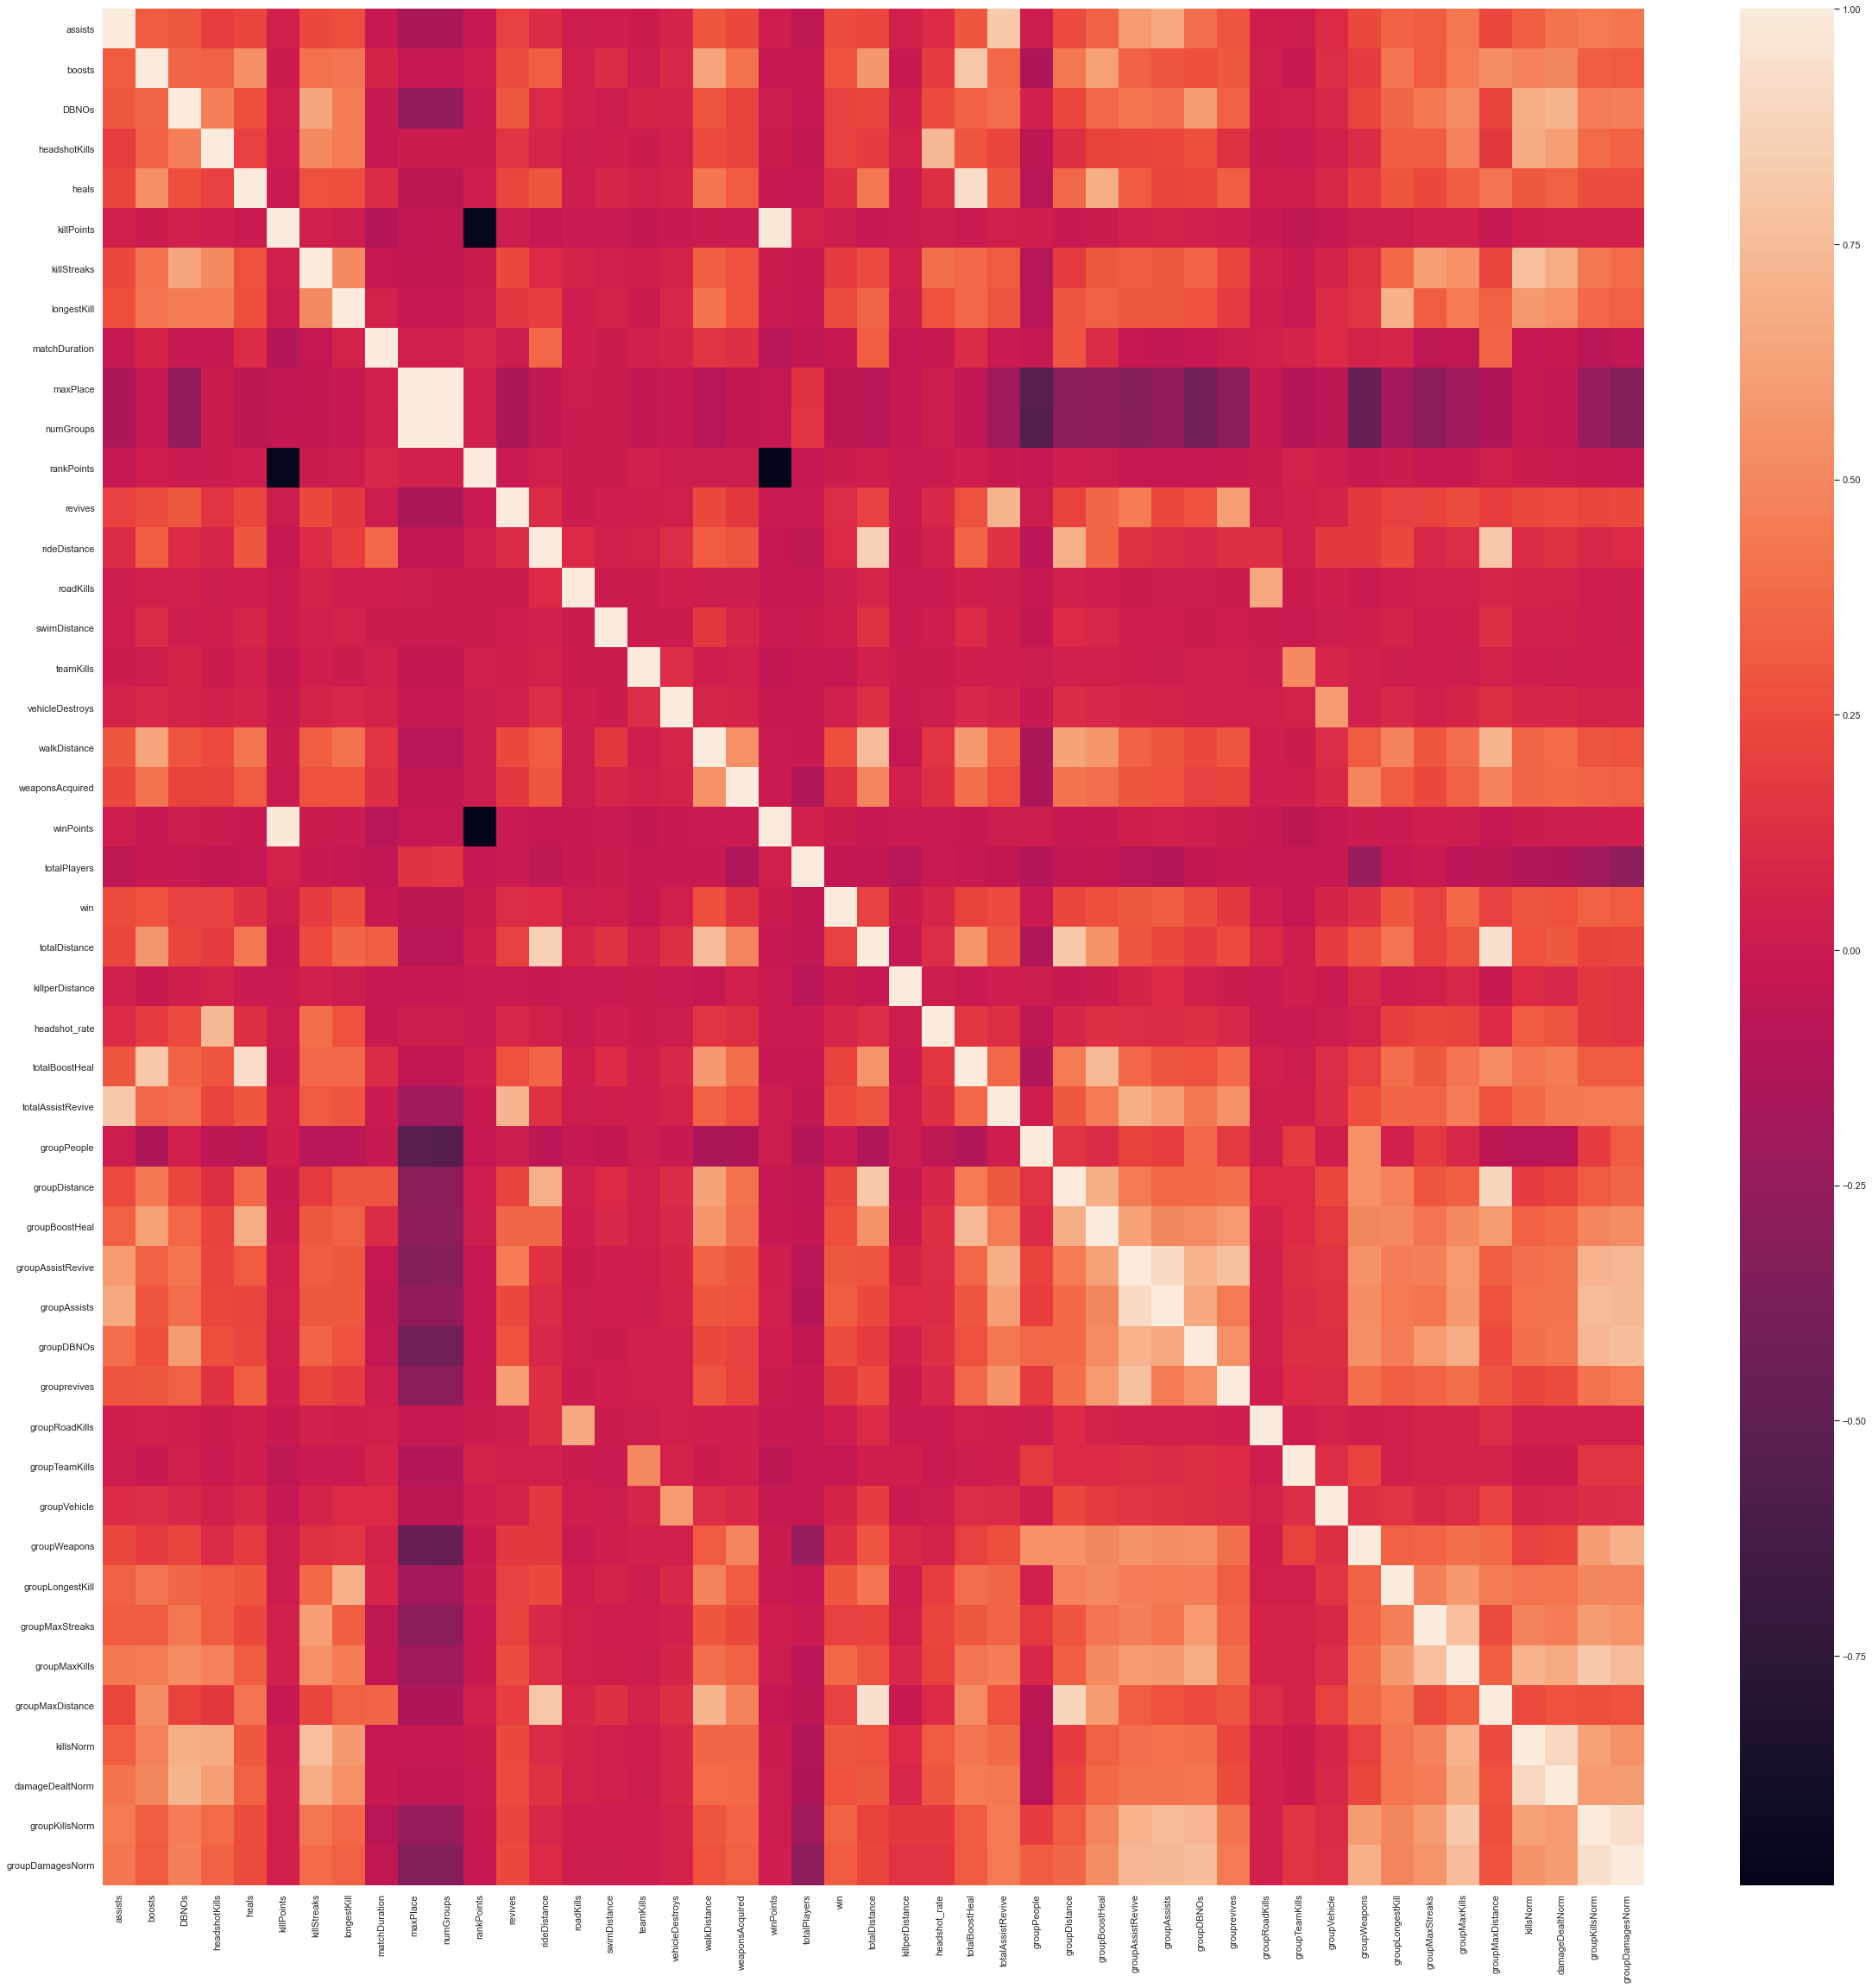

In [64]:
corr = df.corr()
plt.subplots(figsize=(40,40))
sns.heatmap(corr)

In [65]:
# rank points, win points, kill points are almost perfectly correlate to each other.
# As rank points is a new ranking system replacing win + kill, I decide to keep rank and win, and convert 0 values in win to -1.
# In such way, the missing values in rank points and win points will be consistent. 
df.winPoints.replace(to_replace=0, value=-1, inplace=True)
df.drop(columns=['killPoints'], inplace=True)

In [66]:
# Drop maxPlace as it's perfectly correlated to numGroups, and it may skip over placements.
df.drop(columns=['maxPlace'], inplace=True)

<AxesSubplot:>

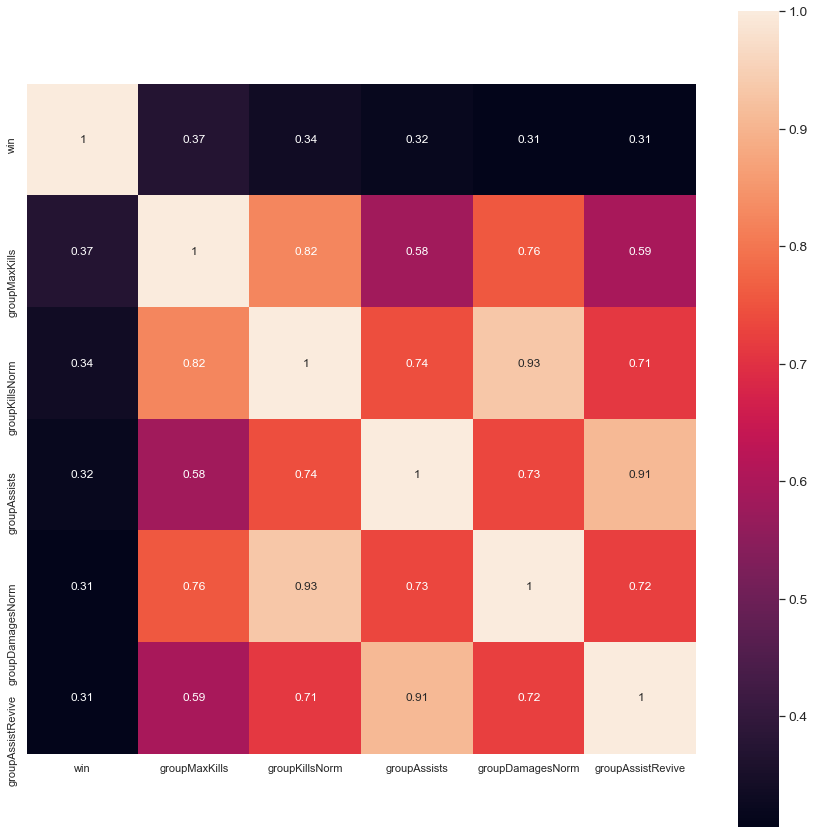

In [67]:
#the first 5 features which are the most correlated to our target: win
plt.subplots(figsize=(15, 15))
cols = df.corr().nlargest(6, 'win')['win'].index
df_corr = df.replace([np.inf, -np.inf], np.nan).dropna()
corr = np.corrcoef(df_corr[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2g', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)

<AxesSubplot:>

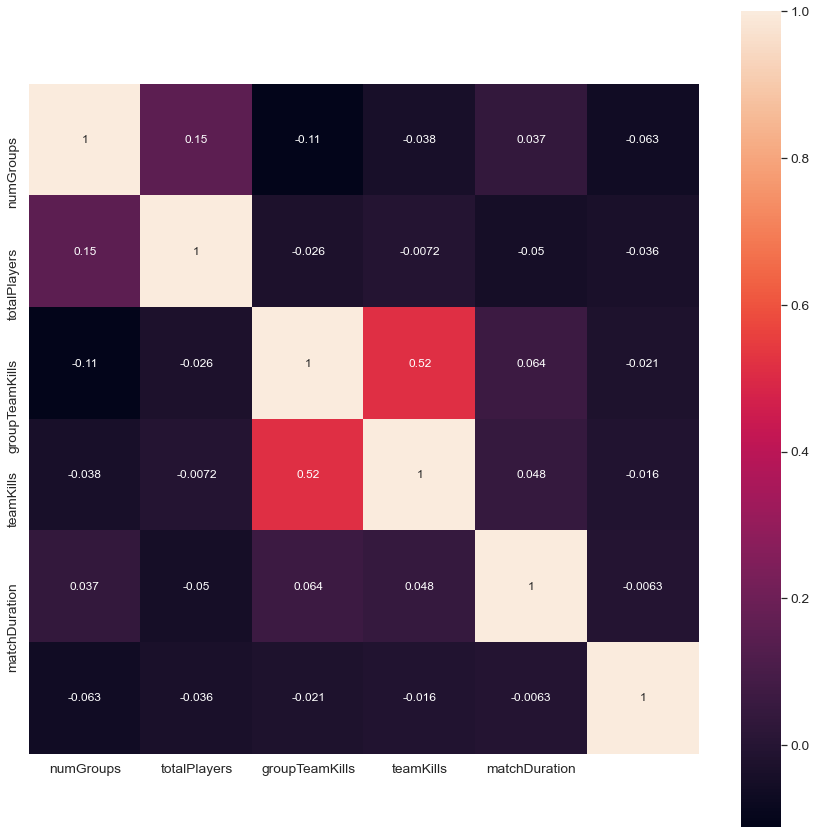

In [68]:
#the first 5 features which are the least correlated to our target: win
plt.subplots(figsize=(15, 15))
cols = df.corr().nsmallest(5, 'win')['win'].index
df_corr = df.replace([np.inf, -np.inf], np.nan).dropna()
corr = np.corrcoef(df_corr[list(cols) + ['win']].values.T)
sns.set(font_scale=1.25)
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2g', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)

<AxesSubplot:xlabel='teamKills', ylabel='count'>

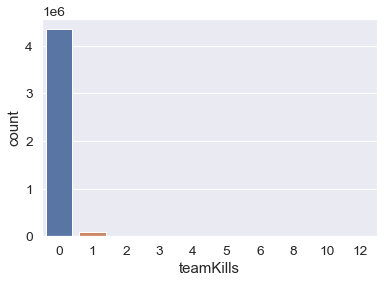

In [69]:
sns.countplot(x=df['teamKills'].sort_values())

In [70]:
# As most of the players do not kill their teammates, this feature is not very indicative.
# The correlation matrix also confirms this, hence we drop teamKills and groupTeamKills
df.drop(columns=['teamKills','groupTeamKills'], inplace=True)

In [71]:
# As matchDuration is not indicative of losing or winning, as it's the same for all participants in the same match.
# We drop matchDuration.
df.drop(columns=['matchDuration'], inplace=True)

In [72]:
# Drop all the IDs
# As I have doubts in it, a copy of the work up to here was made, in case we need to revert this step.
df_no_id = df.copy()
df_no_id.drop(columns=['Id','matchId','groupId'], inplace=True)
df_final = df_no_id.copy()

In [73]:
df_final.head(5)

,assists,boosts,DBNOs,headshotKills,heals,killStreaks,longestKill,matchType,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,mode_category,game_angle,game_mode,totalPlayers,win,totalDistance,killperDistance,headshot_rate,totalBoostHeal,totalAssistRevive,groupPeople,groupDistance,groupBoostHeal,groupAssistRevive,groupAssists,groupDBNOs,grouprevives,groupRoadKills,groupVehicle,groupWeapons,groupLongestKill,groupMaxStreaks,groupMaxKills,groupMaxDistance,killsNorm,damageDealtNorm,groupKillsNorm,groupDamagesNorm
0,0,0,0,0,0,0,0.00,squad-fpp,26,-1,0,0.0000,0,0.00,0,244.80,1,1466,standard,fpp,squad,96,0,244.8000,0.000000,0.0,0,0,4,731.9600,0,0,0,2,0,0,0,5,27.66,1,4,342.80,0.00,0.0000,4.16,425.1000
1,0,0,0,0,0,0,0.00,squad-fpp,25,1484,0,0.0045,0,11.04,0,1434.00,5,-1,standard,fpp,squad,91,0,1445.0445,0.000000,0.0,0,0,4,20370.0445,19,2,2,2,0,0,0,24,77.97,2,2,7265.00,0.00,99.7023,4.36,622.6843
2,1,0,0,0,0,0,0.00,duo,47,1491,0,0.0000,0,0.00,0,161.80,2,-1,standard,tpp,duo,98,0,161.8000,0.000000,0.0,0,1,2,1621.2000,5,1,1,1,0,0,0,4,10.84,1,2,1459.40,0.00,69.3600,2.04,218.8920
3,0,0,0,0,0,0,0.00,squad-fpp,30,1408,0,0.0000,0,0.00,0,202.70,3,-1,standard,fpp,squad,91,0,202.7000,0.000000,0.0,0,0,1,202.7000,0,0,0,0,0,0,0,3,0.00,0,0,202.70,0.00,35.8610,0.00,35.8610
4,0,0,0,0,0,1,58.53,solo-fpp,95,1560,0,0.0000,0,0.00,0,49.75,2,-1,standard,fpp,solo,97,0,49.7500,0.019704,0.0,0,0,1,49.7500,0,0,0,0,0,0,0,2,58.53,1,1,49.75,1.03,103.0000,1.03,103.0000


In [74]:
df_final.shape

(4446554, 46)

In [ ]:
# cols = df.corr().nlargest(11, 'win')['win'].index
# df_corr = df.replace([np.inf, -np.inf], np.nan).dropna()
# sns.pairplot(df_corr[cols], hue="win", diag_kind="kde", markers="+", diag_kws=dict(bw_adjust=2))

## PART 1 CONCLUSION OF OBSERVATIONS:

1.	MATCH TYPE PREFERENCE: 
-	More players prefer first person angle over third person angle.
-	More players prefer grouping with others over playing solo, and the more teammates the merrier.
-	More players prefer entering the ranked mode over playing casually with no ranking.
-	Most games are almost full (full = 100). The mode of the total players’ distribution is 96.

2.	INDIVIDUAL PLAYER PERFORMANCE:
-	Most players made 0 killings in a match, although most of them still managed to make some damages. 
-	There are ~3% of players won the game without making a killing. Being lucky or cheating?
-	When comparing standard game modes with custom modes and the two special events, it’s clear that players in customized /special games scored more killings on average. Two possible reasons: 1. The players who customize games and participate in special events are generally the game enthusiasts (hardcore players), which could indicate that they are more skilled; 2.  The customization and some features in special events could result in more killings and less hidings (e.g. smaller maps, faster rate of blue gassed zone closing in.)
-	First person angle gives a slightly better killing rate on average, although difference is small visually, it might be worth looking into further to verify if first person angle indeed has a statistical significance in improving shot accuracies. 
-	Players who play in solo has higher killing rate on average. One possible reason is that skilled players tend to be more confident in playing solo, while rookies have stronger willingness to group with other players.
-	Number of kills has a positive correlation with winPlacePerc, although there are some players won without making a kill.
-	All 3 types of travel distance have a positive correlation with winPlacePerc, indicating that the more active a player is the better chance in winning. It doesn’t not seem to be necessarily true for custom/special modes. Walking distance seems to still follow the same trend, but the pattern is very faint in riding and swimming distances. Intuitively, travel distance should also have a positive correlation with individual’s survival time in the game.
-	Swimming yields the least distance, possibly due to 2 reasons: 1. By the game design, players need to “breathe” under the water and forced to go out of water to recover regularly; 2. Not all maps have water.
-	There’s a strong positive correlation between heals and boosts used vs winPlacePerc. Heals’ curve flattens towards the higher number of usage, which makes intuitive sense, as the very high usage of healing items means that the players get frequently hit by enemies, indicating that it’s either a very competitive game among participants, or the player is not very skilled comparatively.
-	There's a strong positive correlation between assists and revives vs winPlacePerc, up to 4 times each. Beyond this point, win rate variance increases, and the mean of the win rate decreases as the total usage increases. Assists seem generally more "useful" towards the winning result, and the intuition to explain high revive volumes flattening towards higher usage is the same as the above one for healing items.
-	There's clearly a strong positive correlation between kills vs winPlacePerc, up to around 10 kills. Beyond this, win rate could vary a lot. In the lower range of kill counts, the more people in a group, the lower the correlation is between each individual’s kills vs final wins. Possible reasons could be: 1. each individual is average, but together they form a highly efficient and functional team; 2. Rookies don’t need to do much besides free riding on their teammates’ high performance.   

3.	GROUP PLAYER PERFORMANCE:
-	One very important finding is that the winPlacePerc is shared by the same group of players, regardless of the difference among their individual performances. As a result, we need to understand that the prediction is in fact on a group level instead of on an individual level. 
-	Total kills in a group are positively correlated to chance of winning. Custom/special modes have more killings on average, consistent with our previous findings. 
- 	Travel distance on a group level seems matter more for groups that end up ranked low in final winPlacePerc, and not as much of a determining factor for high performing groups. This pattern is not observed for custom/special modes. 

# PART 2: MACHINE LEARNING MODELS

#### Create a model that predicts whether a player won the match (winPlacePerc == 1) (binary target), based on other available features (excluding winPlacePerc).
- Compare at least 2 different models, as well as a simple baseline, using the performance metric(s) that you deem the most appropriate.
- Split the data into a train and test set. Train and validate your models on the training set, and compare performances on the test set.
- The goal here is not to get the most precise algorithm, but rather to showcase your process when developing models.


## PART 2 (1): DATA SPLIT

#### NOTES:

As this is an imbalanced dataset, we need to use stratification to ensure that each fold in the cross validation has the correct representation of the proportion of both classes.

In [75]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446554 entries, 0 to 4446965
Data columns (total 46 columns):
 #   Column             Dtype  
---  ------             -----  
 0   assists            int64  
 1   boosts             int64  
 2   DBNOs              int64  
 3   headshotKills      int64  
 4   heals              int64  
 5   killStreaks        int64  
 6   longestKill        float64
 7   matchType          object 
 8   numGroups          int64  
 9   rankPoints         int64  
 10  revives            int64  
 11  rideDistance       float64
 12  roadKills          int64  
 13  swimDistance       float64
 14  vehicleDestroys    int64  
 15  walkDistance       float64
 16  weaponsAcquired    int64  
 17  winPoints          int64  
 18  mode_category      object 
 19  game_angle         object 
 20  game_mode          object 
 21  totalPlayers       int64  
 22  win                int64  
 23  totalDistance      float64
 24  killperDistance    float64
 25  headshot_rate     

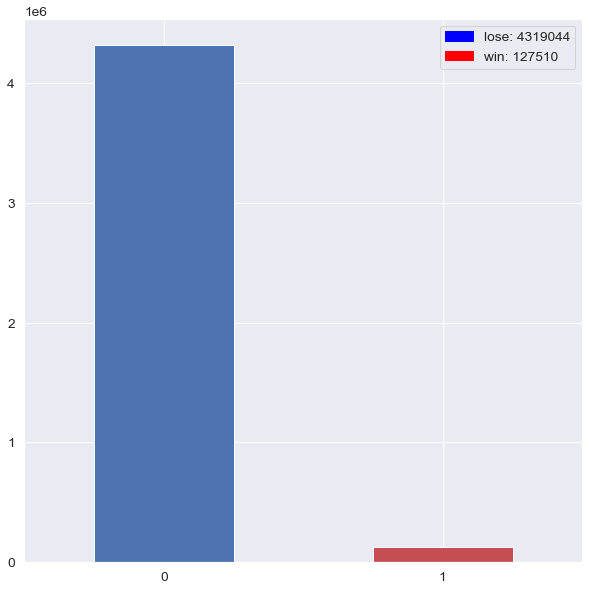

In [76]:
# Data set is extremely inbalanced.
fig, ax = plt.subplots()
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df_final)))
ax = df_final['win'].value_counts().plot(kind='bar', rot=0, color=my_colors, legend=True, figsize=(10,10))
colors = {'lose: 4319044':'blue','win: 127510':'red'}
labels = ['lose: 4319044','win: 127510']
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels); 

In [77]:
# Subsample the dataset due to hardware limitation.
# Another way to do it is to put it up on AWS
df_final = df_final.sample(frac=0.05, random_state=random_state)

In [78]:
# list of categorical features
cat_lst = df_final.select_dtypes(include=['object']).columns

# Get categorical column index
cat_ind =[df_final.columns.get_loc(c) for c in cat_lst if c in df_final]

# Change data type categorical columns
df_final[cat_lst] = df_final.iloc[:, cat_ind].astype('object')

In [79]:
## PART 2 (2): Models

### 1. Baseline- Random Forest
### 2. Model 1- Gaussian Naive Bayesian
### 3. Model 2- LightGBM (turned out to be the best one in the end)

#### NOTES:

1. Use proper encoders for categorical features
2. Convert groupId and MatchId into integers (the current version decided to drop them, but a copy was made with groupId and MatchId kept. The Ids could be useful as the same group shares the same win score, and there's only 1 win in each match. If time permitted, I'd try to properly deal with these 2 Ids and see if they yield more accurate predictions).
3. Use proper scalers for the models which need scaled data
4. Use oversamping techniques to balance the class proportion
5. Use pipeline from imblearn instead of from sklearn 
6. Choose proper metrics for imbalanced data, accuracy is misleading in this case, hence not used
7. Do hyperparameter tuning#Define target vector and feature vectors
y = df_final.filter(items=['win'], axis=1)
X = df_final.drop(columns='win')

#Split between train and test groups and keep ratio of between labels of train and test groups
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, train_size=.8,
    random_state=random_state)


## PART 2 (2): Models

### 1. Baseline- Random Forest
### 2. Model 1- Gaussian Naive Bayesian
### 3. Model 2- LightGBM (turned out to be the best one in the end)

#### NOTES:

1. Use proper encoders for categorical features
2. Convert groupId and MatchId into integers (the current version decided to drop them, but a copy was made with groupId and MatchId kept. The Ids could be useful as the same group shares the same win score, and there's only 1 win in each match. If time permitted, I'd try to properly deal with these 2 Ids and see if they yield more accurate predictions).
3. Use proper scalers for the models which need scaled data
4. Use oversamping techniques to balance the class proportion
5. Use pipeline from imblearn instead of from sklearn 
6. Choose proper metrics for imbalanced data, accuracy is misleading in this case, hence not used
7. Do hyperparameter tuning

In [80]:
# TRANSFORMERS AND MODEL SETTINGS

## Basic setups

# Random_state
random_state = 42

# Number of iterations for hyperparameter tuning
n_iter = 10

# stratified cross validations
cv = StratifiedKFold(n_splits=5, random_state=random_state, shuffle=True)



## Transformers

# For the scaler, the thought was given to both standard and robust. 
# Based on the previous EDA, there seems to be quite some outliers. 
# Although the proper outlier investigation was not done due to time limitation,
# We will still use the robust scaler for now, pending further review.
scaler = RobustScaler()
ica = FastICA(max_iter=500, tol=0.0001,random_state=random_state)
sm = SMOTE(random_state=random_state)



## Classifiers

# Baseline - random forest
# Basic emsemble tree model using bagging technique
rdf = RandomForestClassifier(n_estimators=100, random_state=random_state, n_jobs=-1)

# Model 1 - Gaussian Naive Bayesian
# It does not require hyperparameter tuning, but the data has to be as close as possible to a gaussian distribution, 
# and with independant features, i.e. ICA preprocessing to make feature orthogonal while keeping the non-linear relatioships
gnb = GaussianNB()

# Model 2 - LightGBM
# LightGBM is used as a fast ensemble and boosting method (should save time comparing to XGBoost)
lgbm = LGBMClassifier(objective='binary', verbose= -1, random_state= random_state, n_jobs=-1)

In [101]:
#Numerical transformer for gnb
numerical_transformer_ica= Pipeline(steps=[
    ('scaler', scaler), ('ica', ica)])

# categorical transformer is OHE. Ideally, we would have also generate frequency encoder and target encoder 
# or simply use Catboost for their native implentation, but time was limited
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

#Create the preprocessing pipe of the numerical features and categorical features
pre = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, selector(dtype_include='object'))])

#Preprocessing with dropped categories; running through issues with Naive Gaussian Bayesian when adding categories, 
# i.e. the data is sparse due to OHE 
pre_no_cat = ColumnTransformer(transformers=[
    ('num', numerical_transformer_ica, selector(dtype_exclude='object'))])

#Apply imbalanced mitigation technique based on oversampling strategy Smote
#Append the classifier to the preprocessing pipeline
pipe_rf = Pipeline(steps=[('pre', pre), ('imb', sm), ('clf', rdf)])
pipe_gnb = Pipeline(steps=[('pre', pre_no_cat), ('imb', sm), ('clf', gnb)])
pipe_lgbm = Pipeline(steps=[('pre', pre), ('imb', sm), ('clf', lgbm)])

In [82]:
#Set ramdonmized search paramameters and distributions
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_log_dist = loguniform(1e-4, 1e0)
param_log_10 = loguniform(1e-4, 1e1)
param_log_100 = loguniform(1e0, 1e3)
param_uniary_dist = uniform(0, 1)

#Classifiers hyperparameters and their hyperparmeter search range 
rand_param_rf = [{'clf__criterion': ['gini', 'entropy'],
                  'clf__min_samples_leaf': param_range,
                  'clf__max_depth': param_range,
                  'clf__min_samples_split': param_range[1:]
                 }]

rand_param_lgbm = [{'clf__boosting_type' : ['gbdt', 'dart'],
                    'clf__num_leaves': sp_randint(10, 300),
                    'clf__min_data': sp_randint(10, 100),
                    'clf__max_depth': sp_randint(5, 200),
                    'clf__reg_alpha': uniform(0, 1),
                    'clf__reg_lambda': uniform(0, 1),
                    'clf__learning_rate': uniform(0, 1)
                   }] 

In [83]:
#Randomized search crossvalidation for random forest and ligh gbm
rs_rf = RandomizedSearchCV(estimator=pipe_rf, param_distributions=rand_param_rf, scoring='precision', cv=cv, n_iter=n_iter)
rs_lgbm = RandomizedSearchCV(estimator=pipe_lgbm, param_distributions=rand_param_lgbm, scoring='precision', cv=cv, n_iter=n_iter)


In [85]:
# Due to time limitation, the hyper parameter tuning wasn't done to the satisfaction. 
# Need to look into all the warning messages down below if time permitted. 

# List of pipelines for ease of iteration
pipes = [rs_rf, pipe_gnb, rs_lgbm]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Random Forest',  
             1: 'Gaussian Naive Bayesian',
            2: 'LightGBM'}

print('Hyperparameter tuning in progress...')
best_precision = 0.0
best_clf = 0
best_gs = ''

for idx, rs in enumerate(pipes):
    print('\nEstimator: %s' % pipe_dict[idx])
    # Fit grid search
    rs.fit(X_train, y_train.values.ravel())
    
    # Predict on test data with best params
    y_pred = rs.predict(X_test)
    # Test data precision of model with best params
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f'Test set precision score for best params: {pre}')
    print(f'Associated recall: {rec}')
    print(f'Associated f1: {f1}')
                          
    # Identify highest test precision score from the models
    if precision_score(y_test, y_pred) > best_precision:
        best_precision = precision_score(y_test, y_pred)
        best_rs = rs
        best_clf = idx
 
    try:
        # Best params
        print('Best params: %s' % rs.best_params_)
        # Best training data precision
        print('Best training precision: %.3f' % rs.best_score_)

    except:
        pass
    
print(f'\nClassifier with best test set precision: {pipe_dict[best_clf]}')

Hyperparameter tuning in progress...

Estimator: Random Forest
Test set precision score for best params: 0.23140495867768596
Associated recall: 0.8825847123719465
Associated f1: 0.3666721230970699
Best params: {'clf__min_samples_split': 9, 'clf__min_samples_leaf': 2, 'clf__max_depth': 9, 'clf__criterion': 'entropy'}
Best training precision: 0.234

Estimator: Gaussian Naive Bayesian


FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.


Test set precision score for best params: 0.14621448757994943
Associated recall: 0.7746256895193065
Associated f1: 0.24599599599599598

Estimator: LightGBM
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=21. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=21. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=21. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=21. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=21. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=50. Current value: min_data_in_

In [86]:
# Save the best random search to file in the current working directory
from joblib import dump, load
dump(best_clf, 'best_clf.joblib') 

['best_clf.joblib']

# PART 3: INSIGHTS FROM THE MODELS

Provide some insights on which aspects of a player's in-game information are the most important for explaining a win. 
- You may use a model from part 2 for this or another approach.
- Be mindful of the context. The variables most correlated with winning might not be the most interesting or leverageable in practice.

## PART 3 (1): BUILT IN FEATURE IMPORTANCE IN A MODEL

### NOTES:
The showcase of feature importance is based on the random forest.

In [89]:
rf_bl = pipe_rf.fit(X_train, y_train.values.ravel())
rf_bl

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023EA1BBDAF0>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023EA1BBDAC0>)])),
                ('imb', SMOTE(random_state=42)),
                ('clf', RandomForestClassifier(n_jobs=-1, random_state=42))])

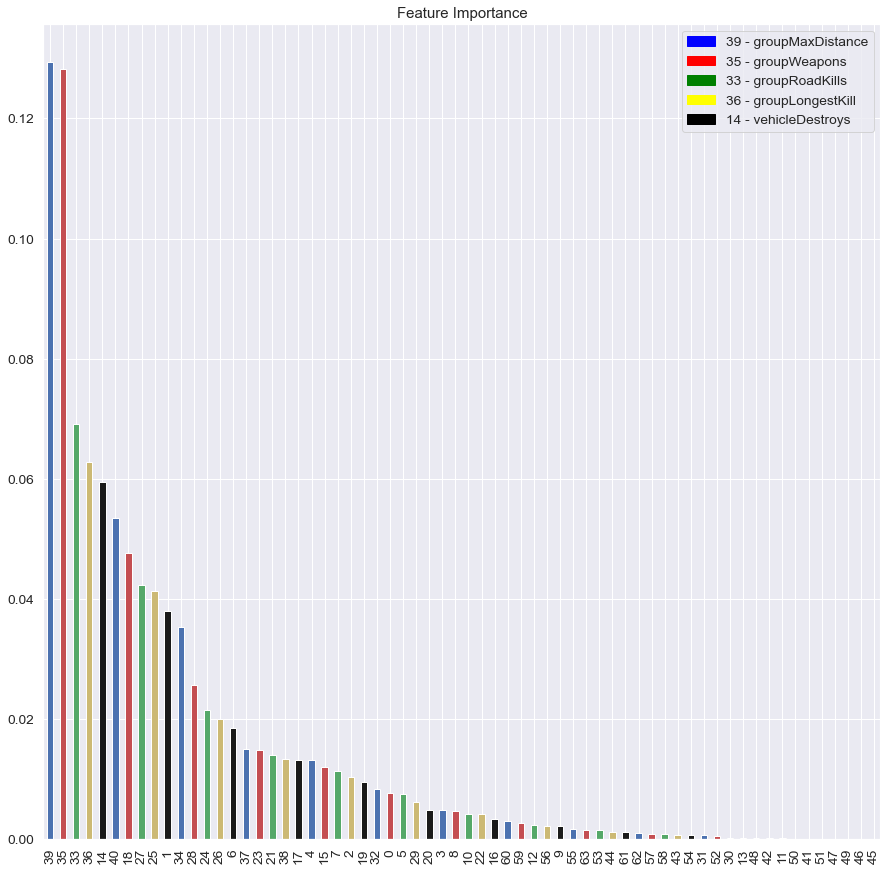

In [93]:
from itertools import cycle, islice
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df_final)))
pd.Series(rf_bl.named_steps['clf'].feature_importances_).sort_values(ascending=False).plot(
    kind='bar', title='Feature Importance', stacked=False, color=my_colors,figsize=(15,15));
colors = {'39 - groupMaxDistance':'blue','35 - groupWeapons':'red','33 - groupRoadKills': 'green','36 - groupLongestKill': 'yellow','14 - vehicleDestroys': 'black'}
labels = ['39 - groupMaxDistance','35 - groupWeapons','33 - groupRoadKills','36 - groupLongestKill','14 - vehicleDestroys']
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

<p style="color:blue">Horizontal bar looks better?</p>


## PART 3 (2): PLOTS

1. Receiver Operating Characteristic Curve
2. Precision Recall Curve
3. Confusion Matrix

### NOTES:
If time permitted, would like to look into the models deeper to improve them.

In [94]:
y_pred = pipe_rf.predict(X_test)
y_pred_prob = pipe_rf.predict_proba(X_test)

print('roc_auc score: ', roc_auc_score(y_test, y_pred_prob[:,1]))
print(classification_report(y_test,y_pred))

roc_auc score:  0.9645506731826754
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     43197
           1       0.46      0.48      0.47      1269

    accuracy                           0.97     44466
   macro avg       0.72      0.73      0.73     44466
weighted avg       0.97      0.97      0.97     44466



Text(0.5, 0, 'False Positive Rate')

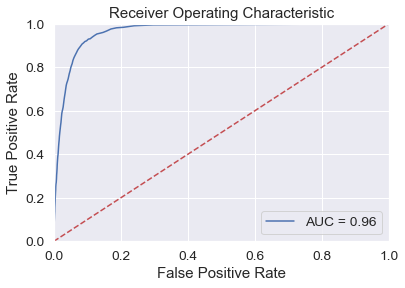

In [96]:
# Plot ROC curve
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Average precision-recall score: 0.45


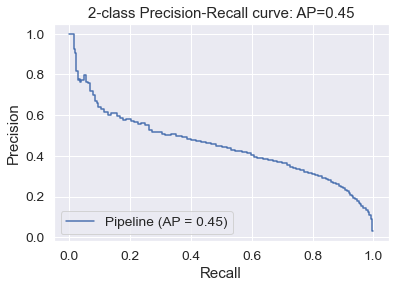

In [97]:
# Plot precision_recall curve
average_precision = metrics.average_precision_score(y_test, y_pred_prob[:,1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
disp = metrics.plot_precision_recall_curve(rf_bl, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision));

<p style="color:blue">So how well is the model performing? If not great, what methods are you going to use to improve it</p>

- Try more models (look at PR curvies of different models)
- Grid search
- Feautre engineering
- More data

<p style="color:blue">Would you trust PR curve or ROC curve in this case?</p>


<p style="color:blue">Have you tried to tune the thresholds?</p>

- Change the probablity thresholds



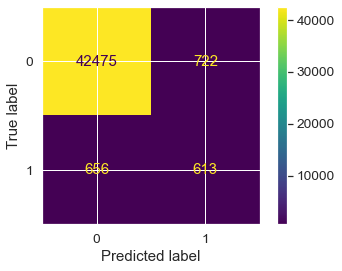

In [98]:
# Plot confusion matrix
metrics.plot_confusion_matrix(rf_bl, X_test, y_test)

In [ ]:
# Codes to plot ROC curves for all 3 models. Was not able to fix the code to properly run it due to time limitation.

# Instantiate the classfiers and make a list
classifiers = [
    pipe_rf,
    pipe_gnb,
    pipe_lgbm
]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train.values.ravel())
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# plot roc_auc
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3g}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

<p style="color:blue">Do you have an updated version now?</p>

## PART 3 (3): SHAP INTERPRETATION

### NOTE:

To properly look at interpretation and explanation of predictions, SHAP is a very powerful tool. 

Given time limitation, SHAP was only applied to the train set, but not the test set. In practice the results given by train set and test set could have differences. Would like to try and look into this more. 

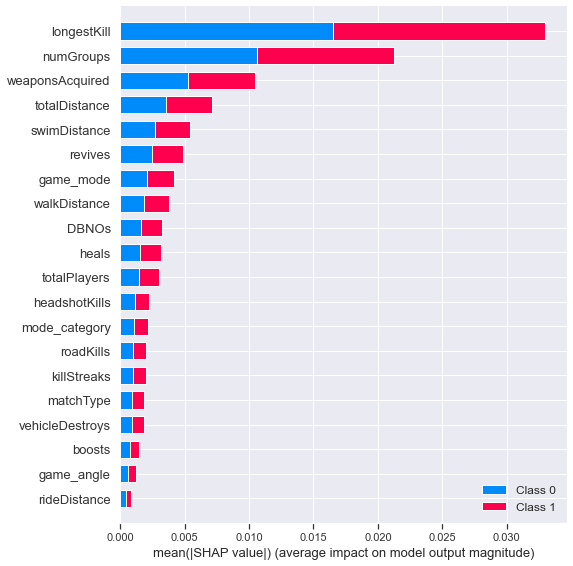

In [102]:
# Train the preprocessing to the training set
pre.fit(X_train)
# Apply preprocessing to the training set
X_train_proc = pre.transform(X_train)
# Train random forest baseline model with default parameters
rdf.fit(X_train_proc, y_train.values.ravel())
# Convert categorical value to dummy integers
X_train_pro = pd.get_dummies(X_train)
# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(rdf)
# Generate shap_values for 1st 10,000 samples, for this is computationaly heavy
# Ideally the sampling would be larget and generated randomly
shap_values = explainer.shap_values(X_train_pro)
# Generate Shap summary plot of the features having the most importance in the model training
shap.summary_plot(shap_values, features=X_train_pro, feature_names=X.columns)

<p style="color:blue">If you were given more time, what would you have done differently?</p>


<p style="color:blue">How do you put this model in production? Briefly explain the process</p>

- Batch Prediction
    - Train the models
    - Validate and select the best model
    - Out of time validation (Champion vs Challenger)
    - Swithc to the challenger model for deployment
        - Save the model and model pipeline (joblib)
        - Feature table is generated daily (airflow automation: data engineer)
        - Scoring/prediction server (AWS EC2: python conda env + packages + load model pipeline + call .predict())
    - Monitor the actual prediction
        - Validation in production
        - Feature drift ==> retrain

- Real-time Prediction
    - Had some experience with Lambda function (real-time)
    - SageMaker ==> prediction endpoint (API)
    - Dockerize the model


<p style="color:blue">How do you validate that the top features would work in real life?</p>
